In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# set the filepath and load in a shapefile
fp = 'province_borders'
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

regione              provincia sigla  \
0     Abruzzo    Provincia di Chieti    CH   
1     Abruzzo  Provincia di L'Aquila    AQ   
2     Abruzzo   Provincia di Pescara    PE   
3     Abruzzo    Provincia di Teramo    TE   
4  Basilicata    Provincia di Matera    MT   

                                            geometry  
0  POLYGON ((14.77957 42.06983, 14.76069 42.04216...  
1  POLYGON ((13.76525 42.42006, 13.80861 42.37883...  
2  POLYGON ((14.25445 42.44494, 14.22862 42.41554...  
3  POLYGON ((14.14623 42.53063, 14.10065 42.53144...  
4  POLYGON ((16.25152 40.83351, 16.41105 40.70231...

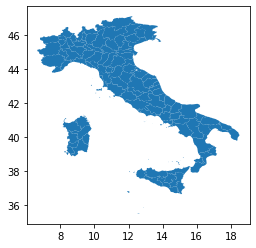

In [8]:
map_df.plot()

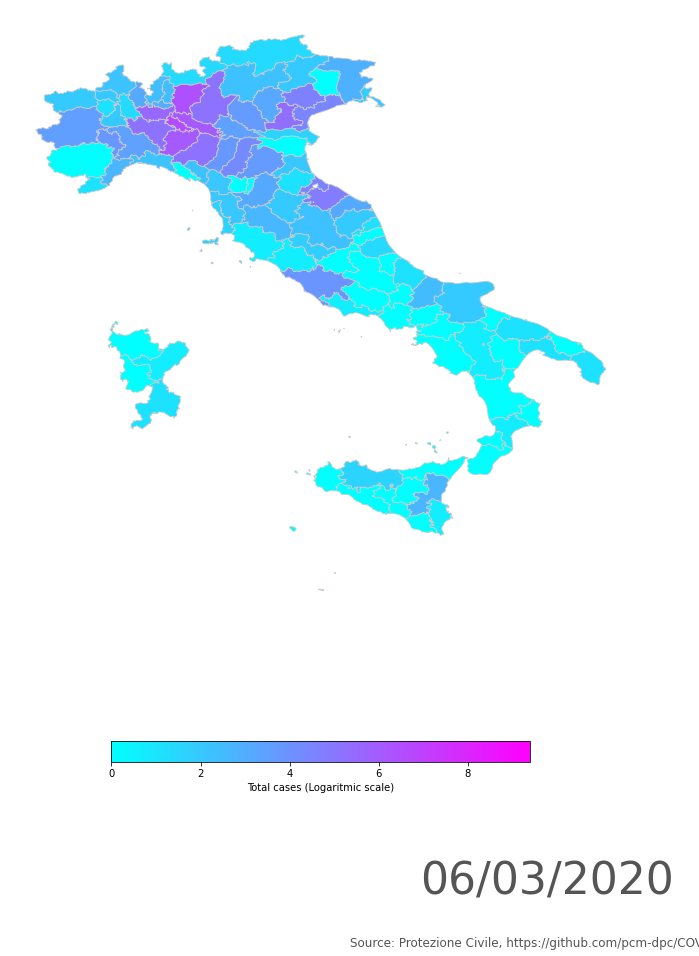

In [4]:
folder = 'dati-province/'
name = 'dpc-covid19-ita-province-20200306.csv'
import matplotlib as mpl
import numpy as np
import re
def create_data(name):
    
    # decide wether we normilize or not
    folder = 'dati-province/'
    normalization = False
    column = 'totale_casi'
    df = pd.read_csv(folder+name, header=0)
    df = df.rename(columns={'sigla_provincia': 'sigla'})
    
    if normalization:
        df['totale_casi'] = df['totale_casi']/df['totale_casi'].sum()
        vmin, vmax = -1, 1
    else:
        vmin, vmax = 0, 12000

    merged = map_df.set_index('sigla').join(df.set_index('sigla'))
    return merged
    
def plot_day( name,title = False, save = False, log = True, legend = True):
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 40,
        }
    # decide wether we normilize or not
    folder = 'dati-province/'
    column = 'totale_casi'
    cmap = mpl.cm.cool
    df = pd.read_csv(folder+name, header=0,  encoding = "ISO-8859-1")
    df = df.rename(columns={'sigla_provincia': 'sigla'})
    
    if log:
        df['totale_casi'].where(df['totale_casi'] <= 1, 1)
        df['totale_casi'] = df['totale_casi'].apply(lambda x: np.log(float(x)))
        vmin, vmax = 0, np.log(12000)
    else:
        vmin, vmax = 0, 12000
        
    merged = map_df.set_index('sigla').join(df.set_index('sigla'))
    
      
    fig, ax = plt.subplots(1, figsize=(15, 15))
    if title:
        # find title from the name 
        start = int(re.findall(r'(\d{8})', name)[0])
        year = start //10000
        day = start%100
        month = (start%10000)//100
        title = '{0:02}/{1:02}/{2:04}'.format(day, month, year)
        #plt.title(title, fontdict=font)  
        ax.annotate(title, xy=(0.6, 0.1),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=44, color='#555555')
        ax.annotate('Source: Protezione Civile, https://github.com/pcm-dpc/COVID-19',xy=(0.5, 0.02),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
    ax.axis('off')
    if log:
        P = merged.plot(column=column, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8',  norm=plt.Normalize(vmin=vmin, vmax=vmax))
    else:
        P = merged.plot(column=column, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')
    
    if legend:
        # Create colorbar as a legend
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
        # empty array for the data range
        sm._A = []
        # add the colorbar to the figure
        if log:
            cbar = fig.colorbar(sm, orientation = 'horizontal', label='Total cases (Logaritmic scale)', fraction = 0.1, shrink = 0.5)
        else:
            cbar = fig.colorbar(sm, orientation = 'horizontal', label='Total cases', fraction = 0.1, shrink = 0.5)

    if save:
        plt.savefig('plot/' + name[:-4] + '.png')
plot_day(name, title = True, save = True)


In [7]:
import os
import re
import functools
folder = 'dati-province/'
daily_data = os.listdir(folder)
daily_data.remove('dpc-covid19-ita-province.csv')
def compare_function(file1, file2):
    start1 = int(re.findall(r'(\d{8})', file1)[0]) % 10000
    day1 = start1%100
    month1 = start1//100
    
    start2 = int(re.findall(r'(\d{8})', file2)[0]) % 10000
    day2 = start2%100
    month2 = start2//100
    
    if (month2 < month1) or (month2 == month1 and day2 < day1):
        return 1
    else:
        return -1


In [8]:
daily_data.sort(key = functools.cmp_to_key(compare_function))

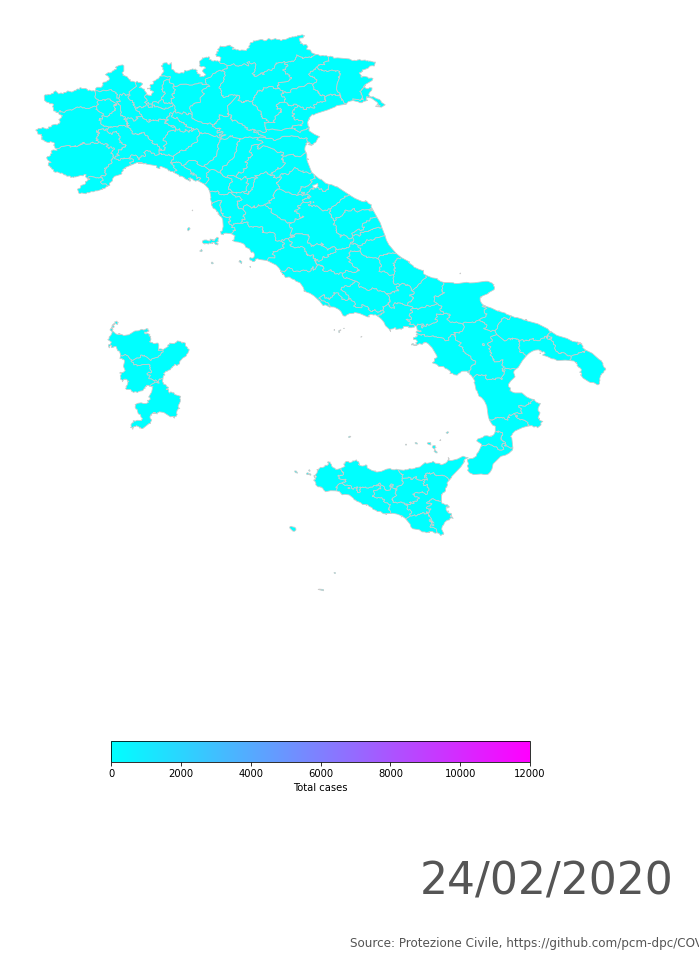

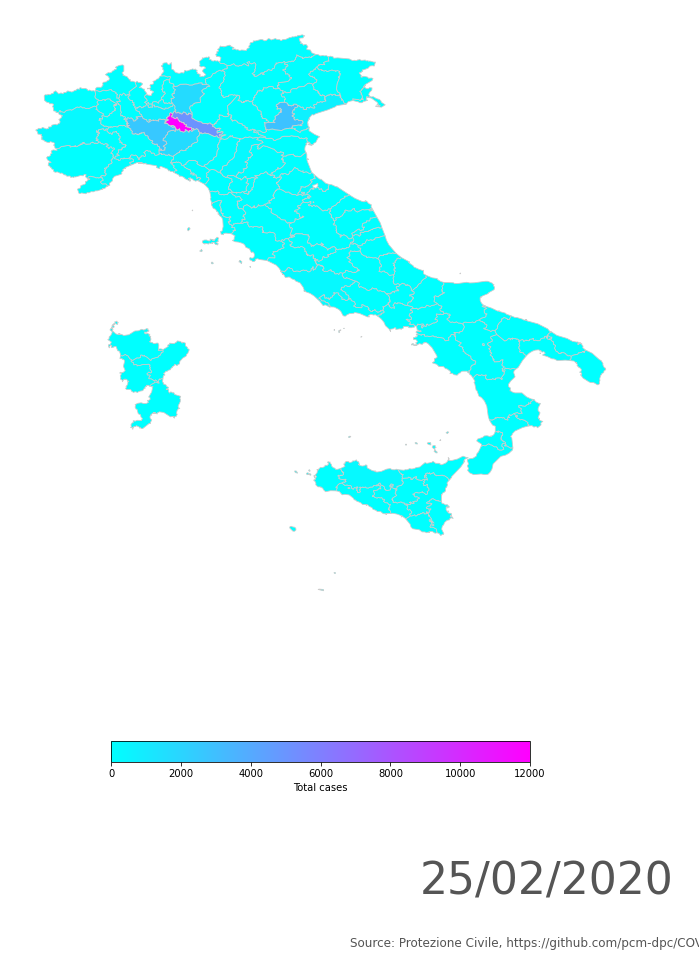

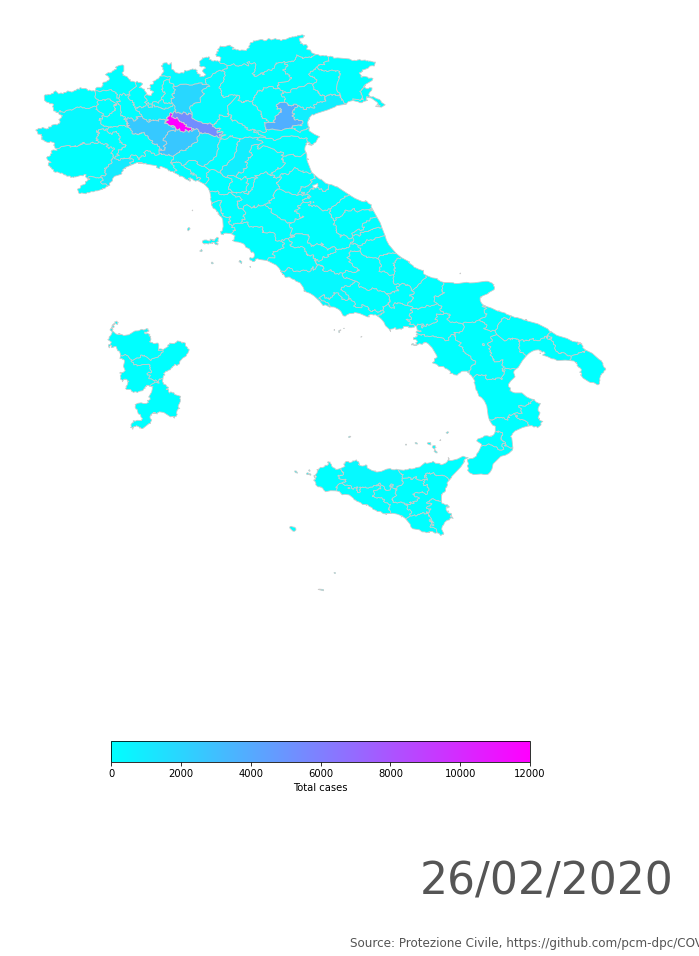

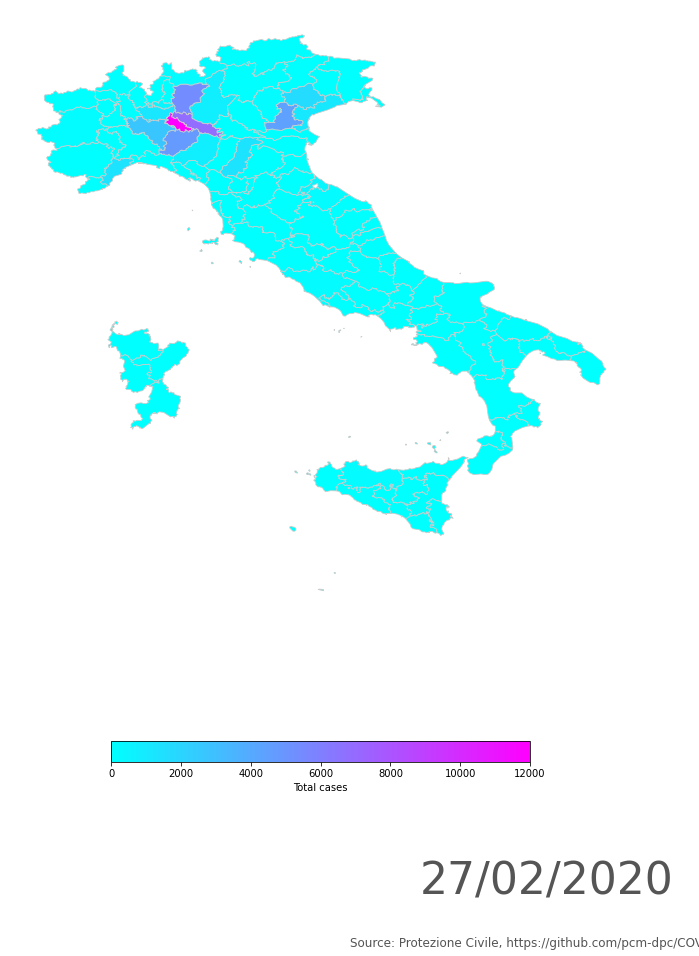

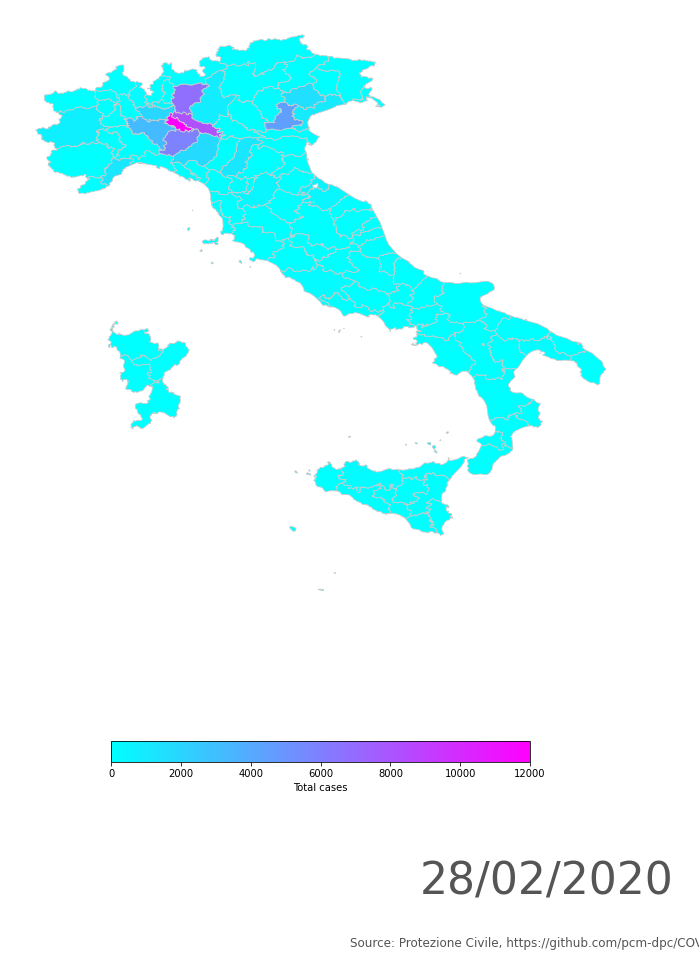

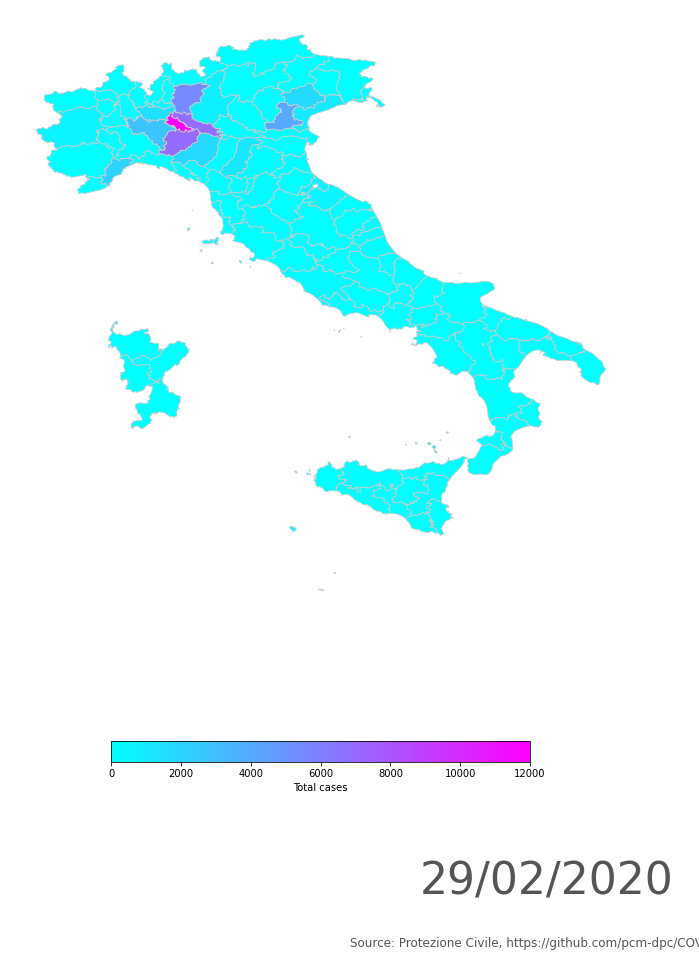

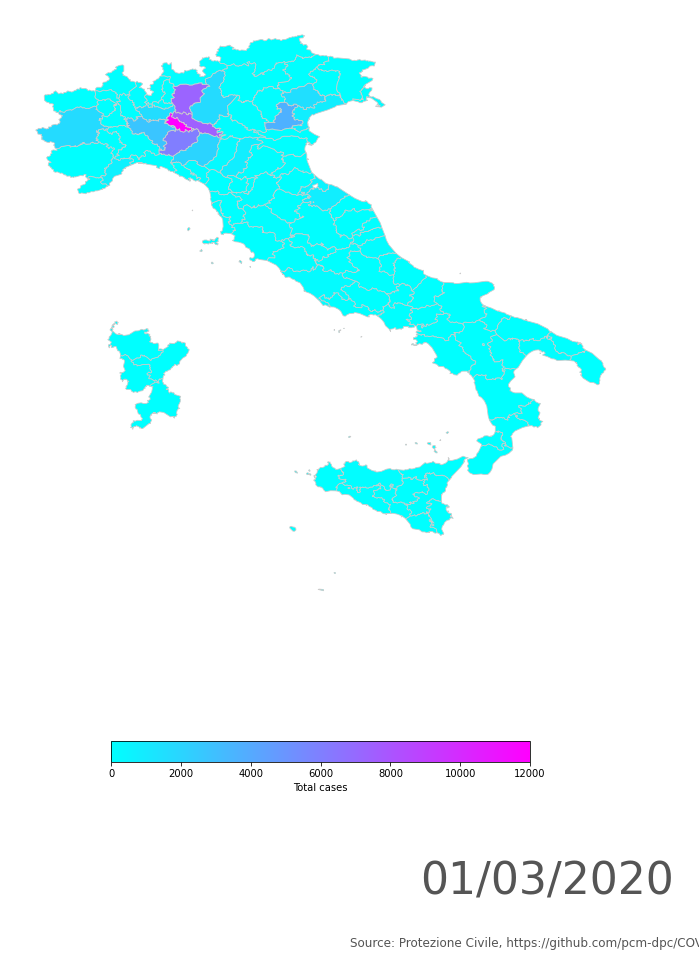

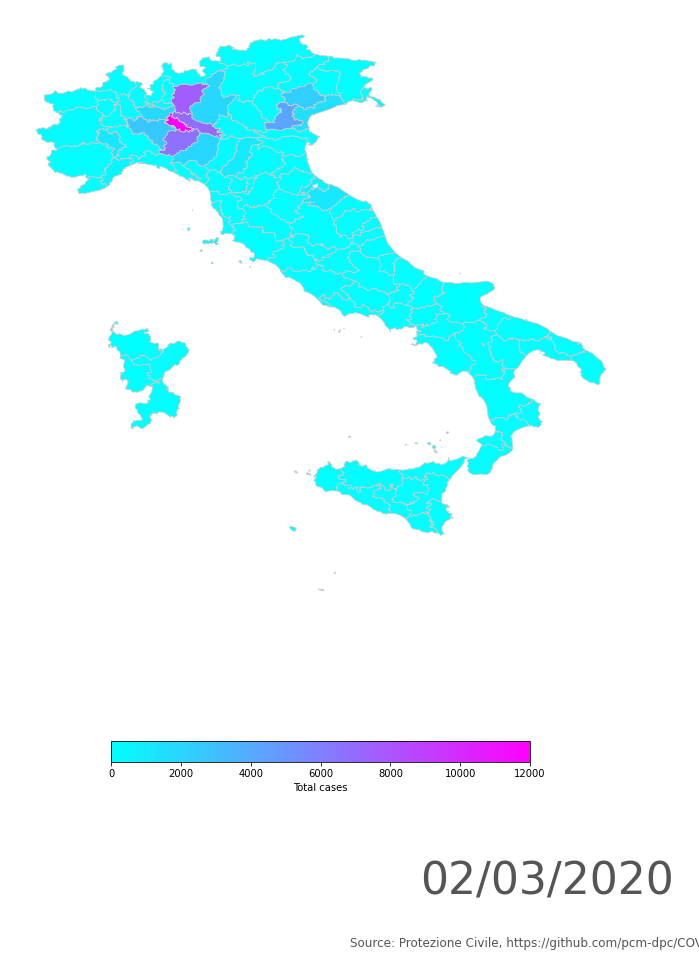

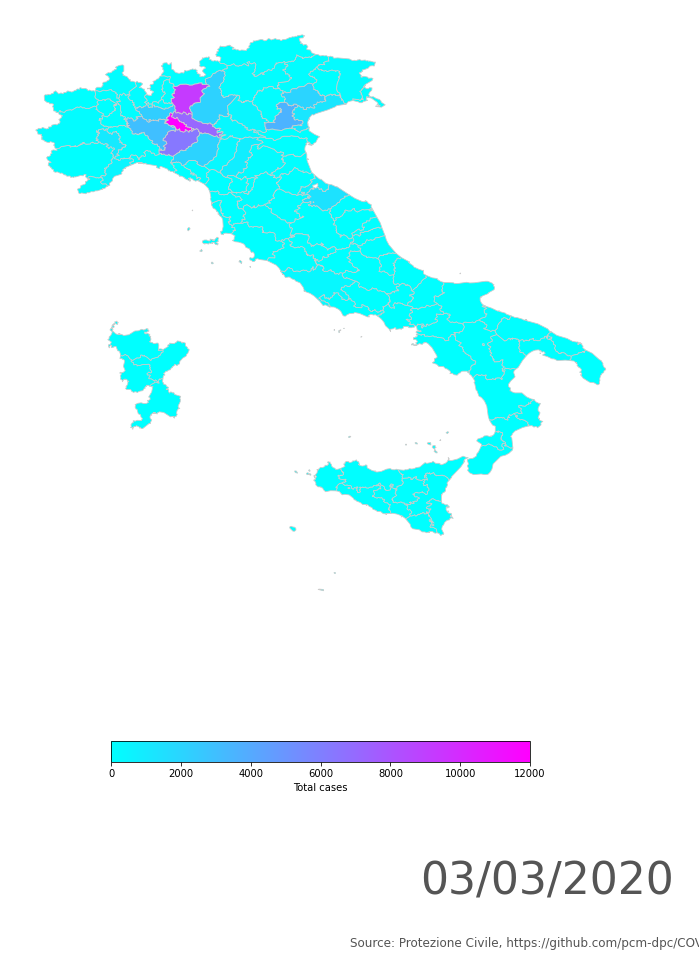

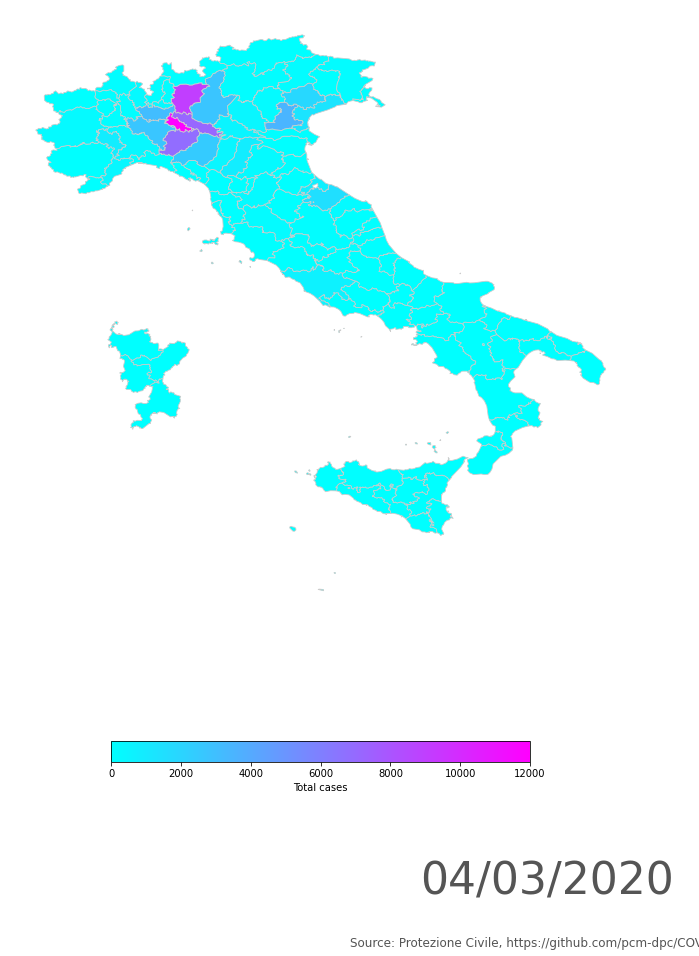

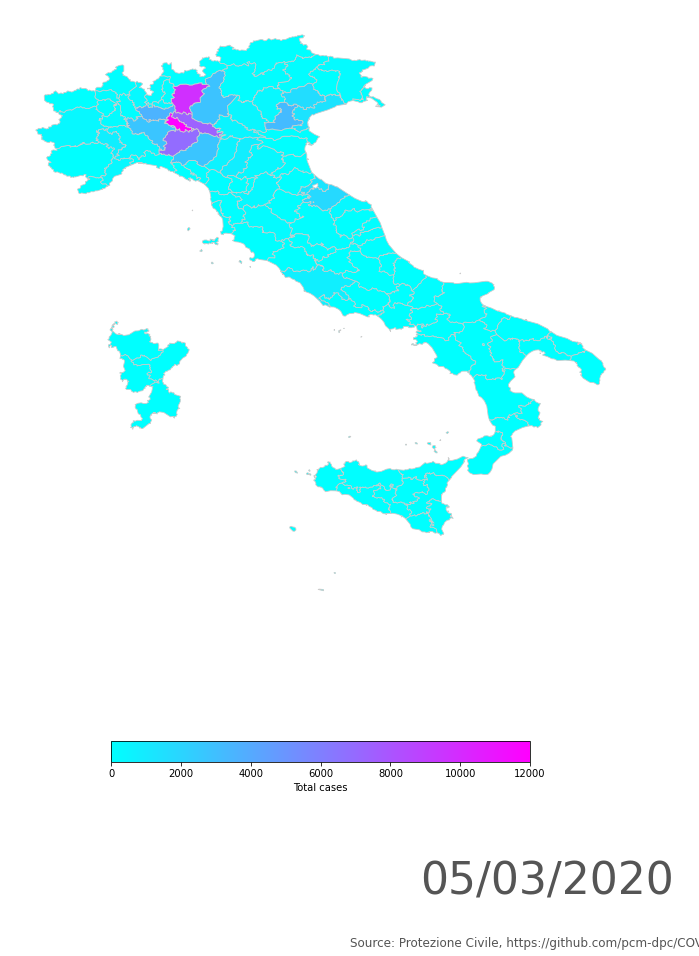

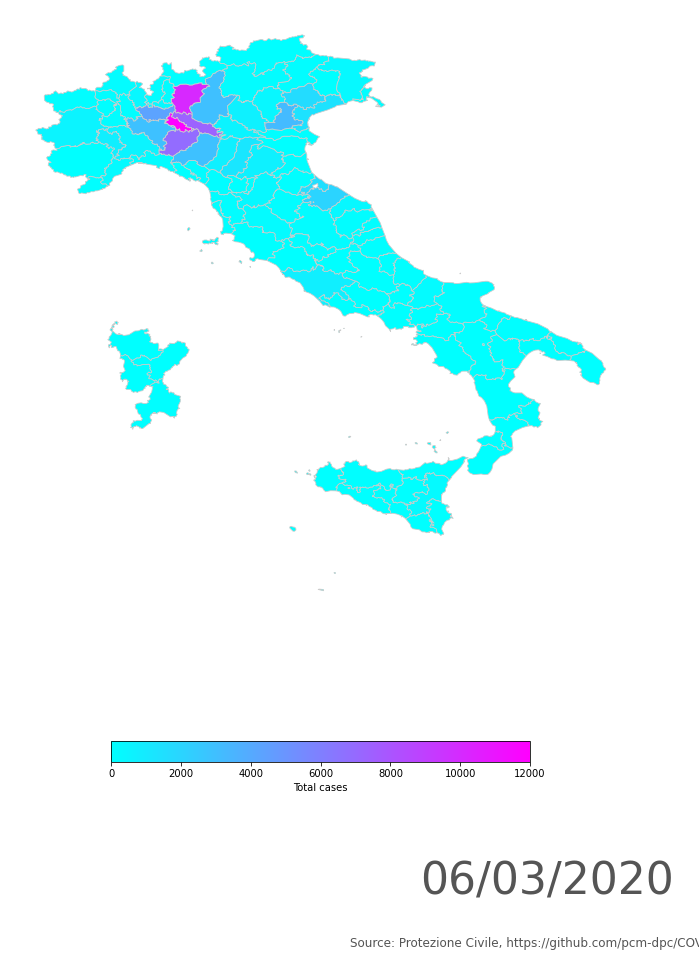

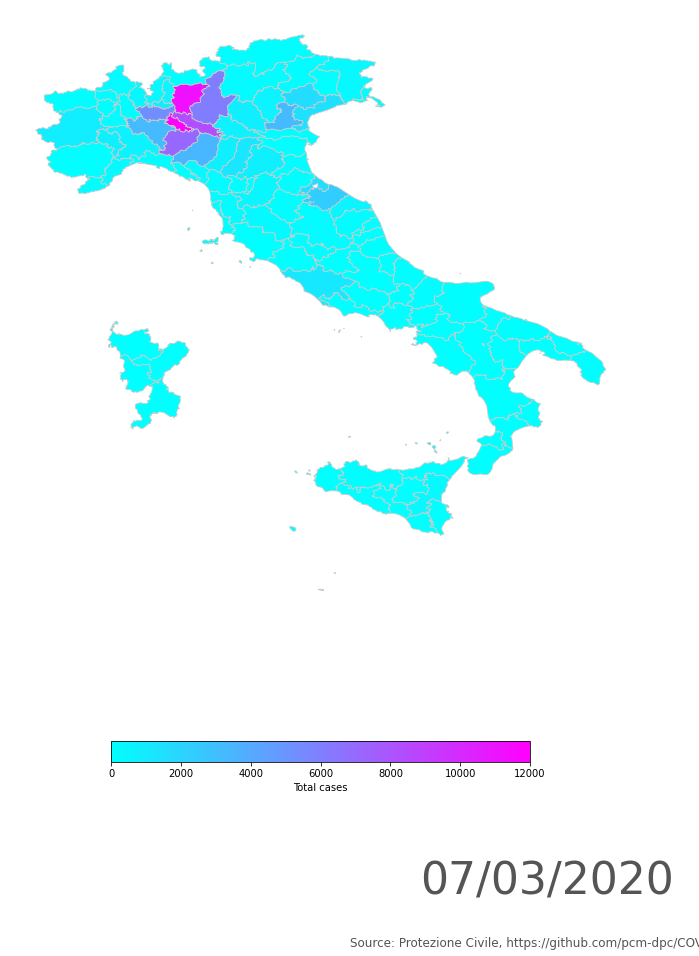

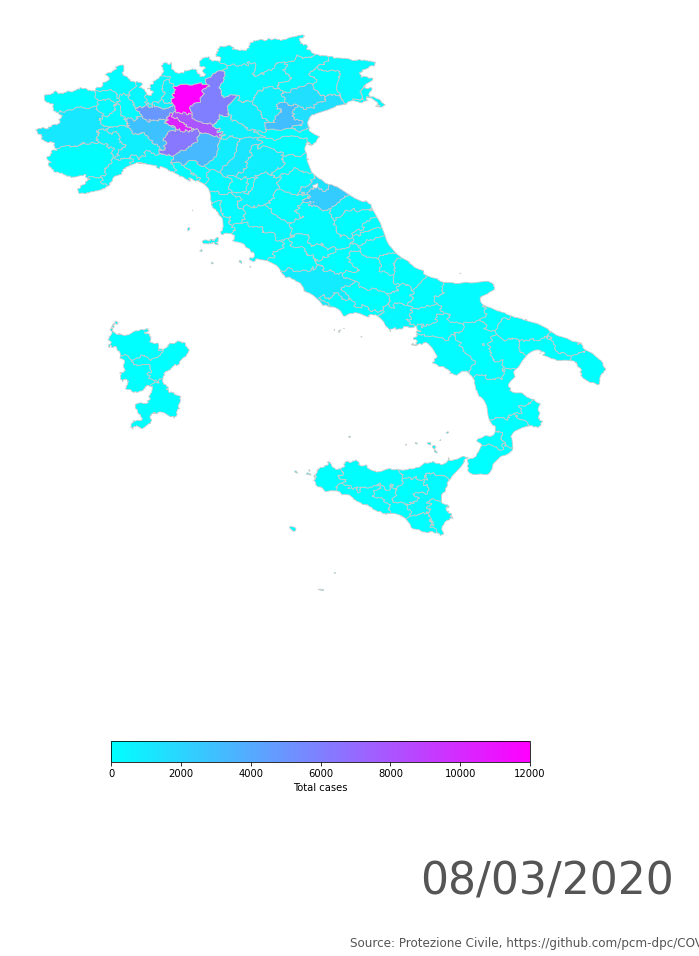

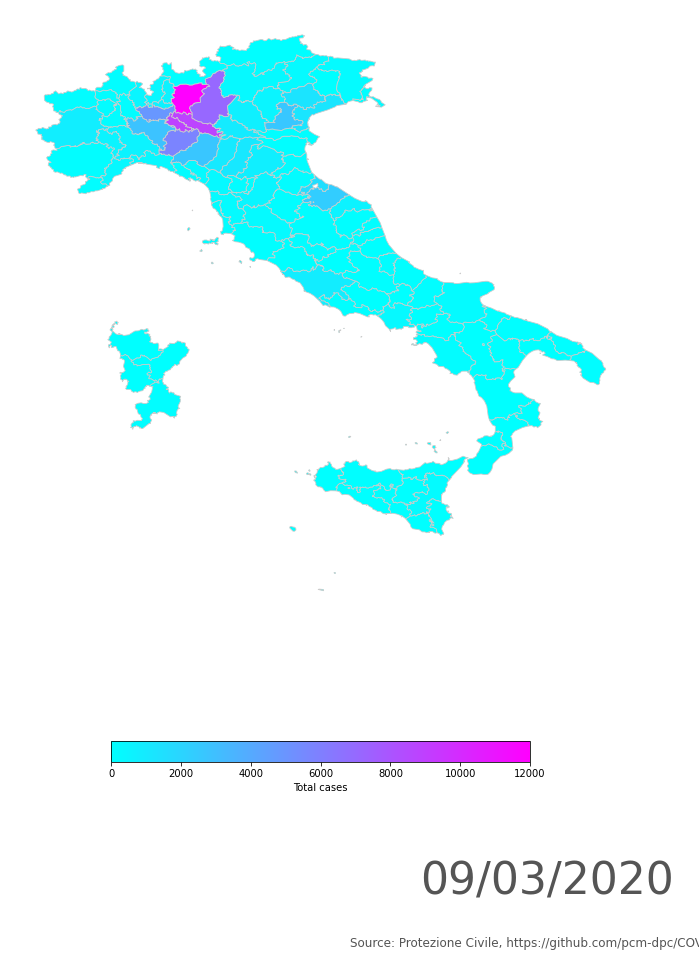

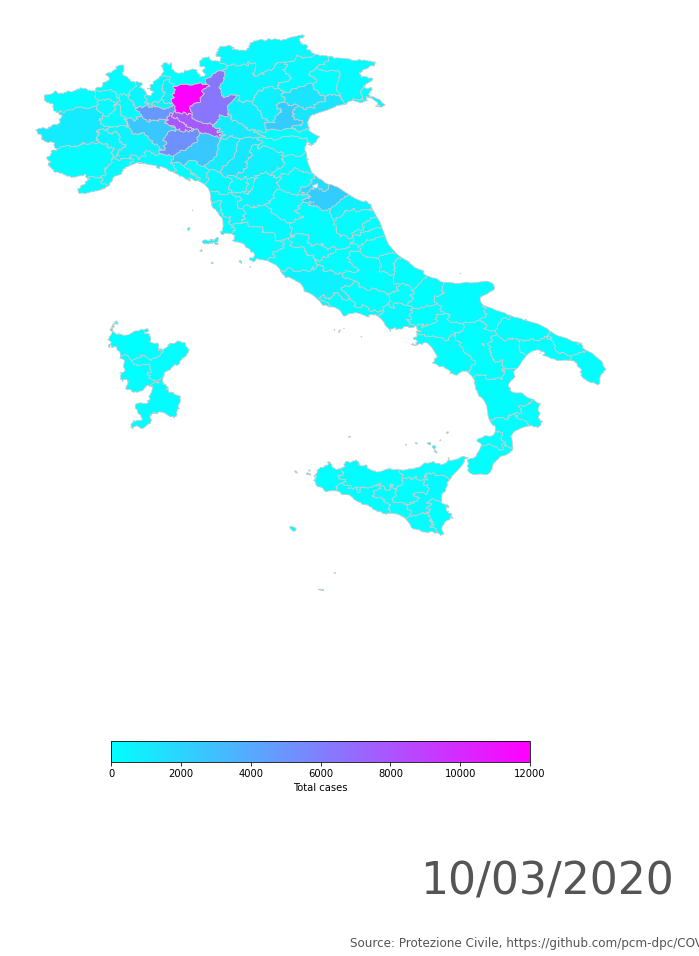

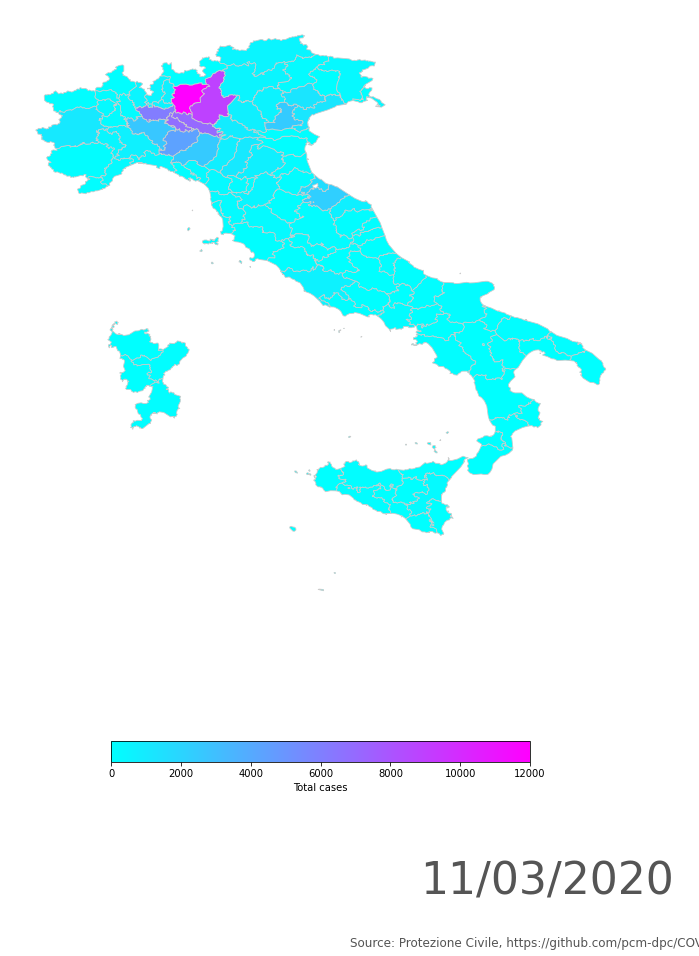

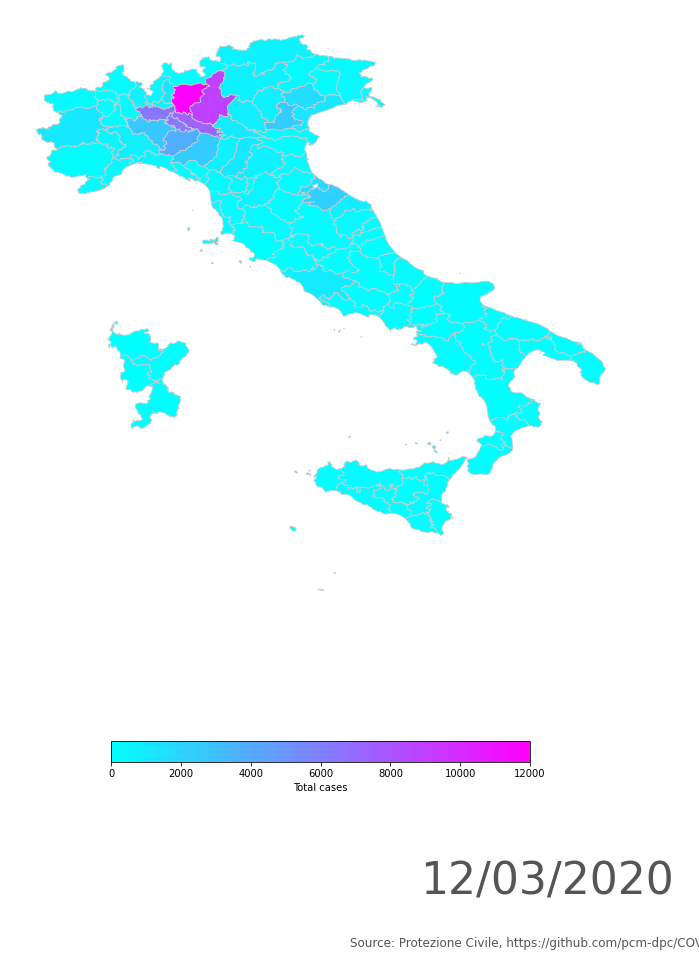

In [9]:
for day in daily_data:
    plot_day(day, title = True, save = True, log = False)

In [10]:
fig = plt.figure()

def init():
      sns.heatmap(np.zeros((nx, ny)), vmax=.8, square=True)

def animate(i):
    data = np.random.rand(nx, ny)
    sns.heatmap(data, vmax=.8, square=True)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=20, repeat = False)

NameError: name 'animation' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
folder = 'dati-province/'
column = 'totale_casi'
df = pd.read_csv(folder+name, header=0)
df = df.rename(columns={'sigla_provincia': 'sigla'})
df['totale_casi'].where(df['totale_casi'] <= 1, 1)
df['totale_casi'] = df['totale_casi'].apply(lambda x: np.log10(float(x)))

/home/mario/git/italian_map/venv/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/mario/git/italian_map/venv/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/mario/git/italian_map/venv/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (T

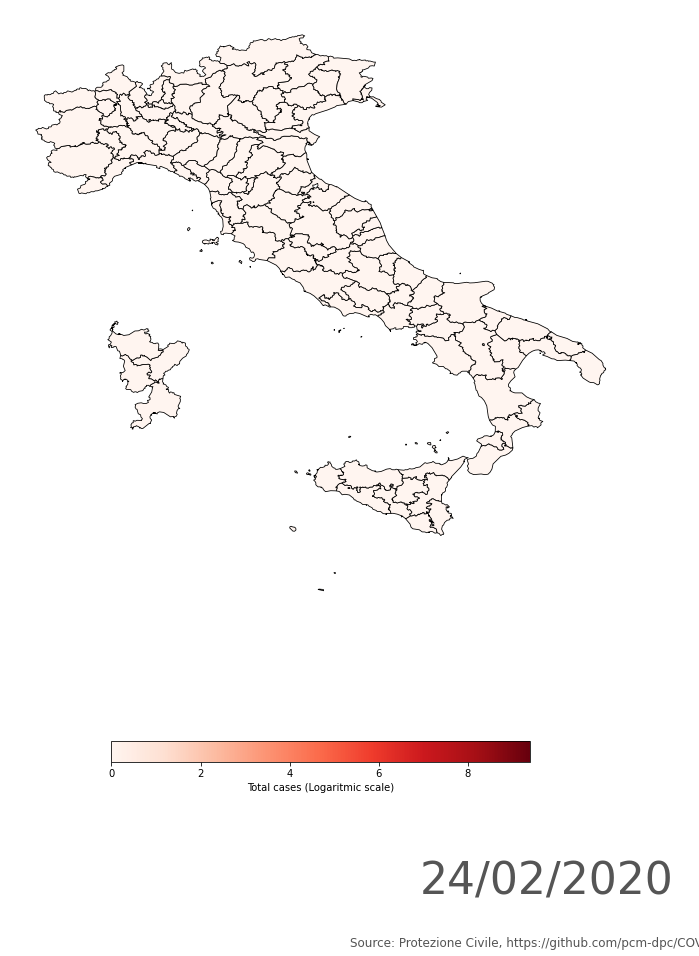

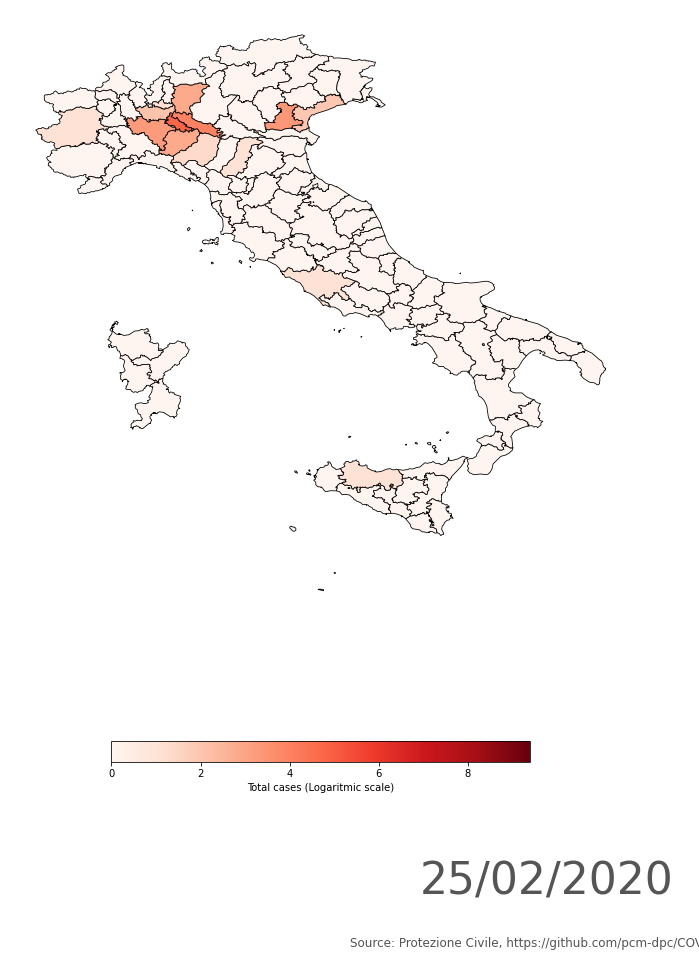

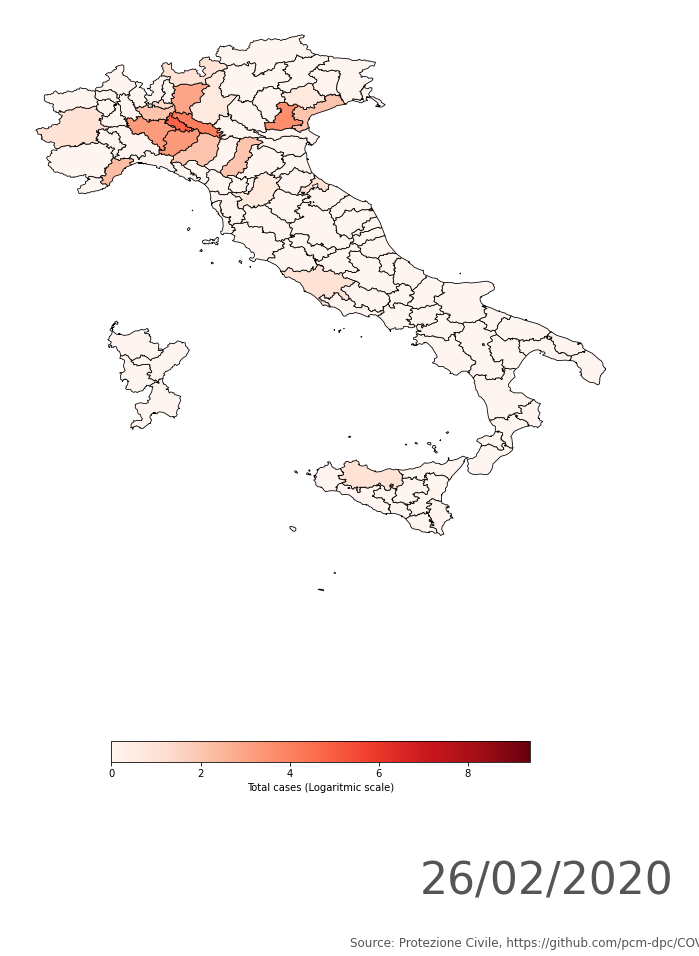

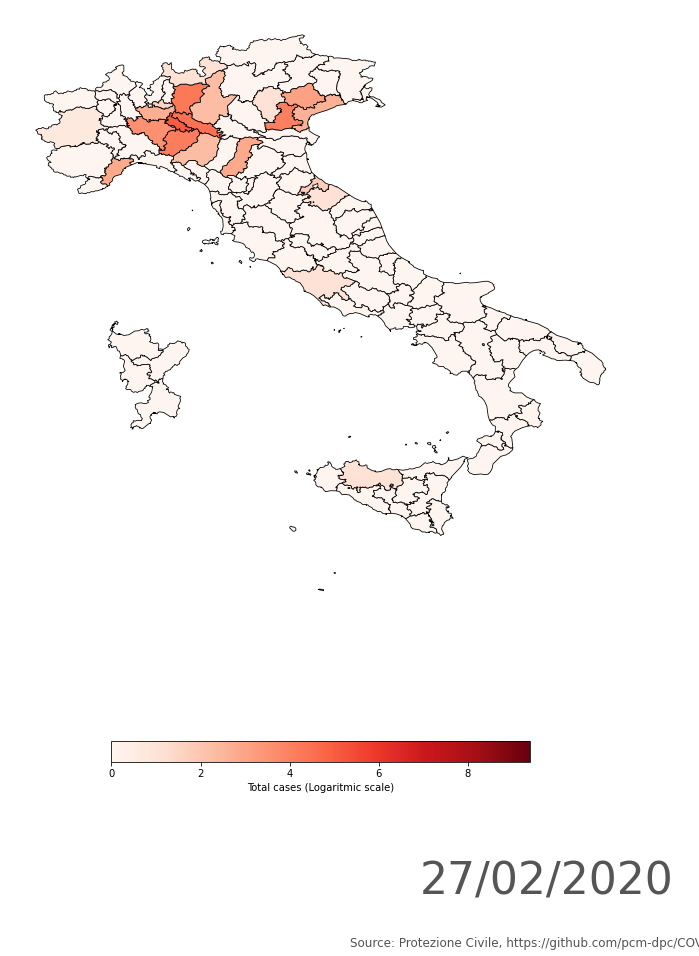

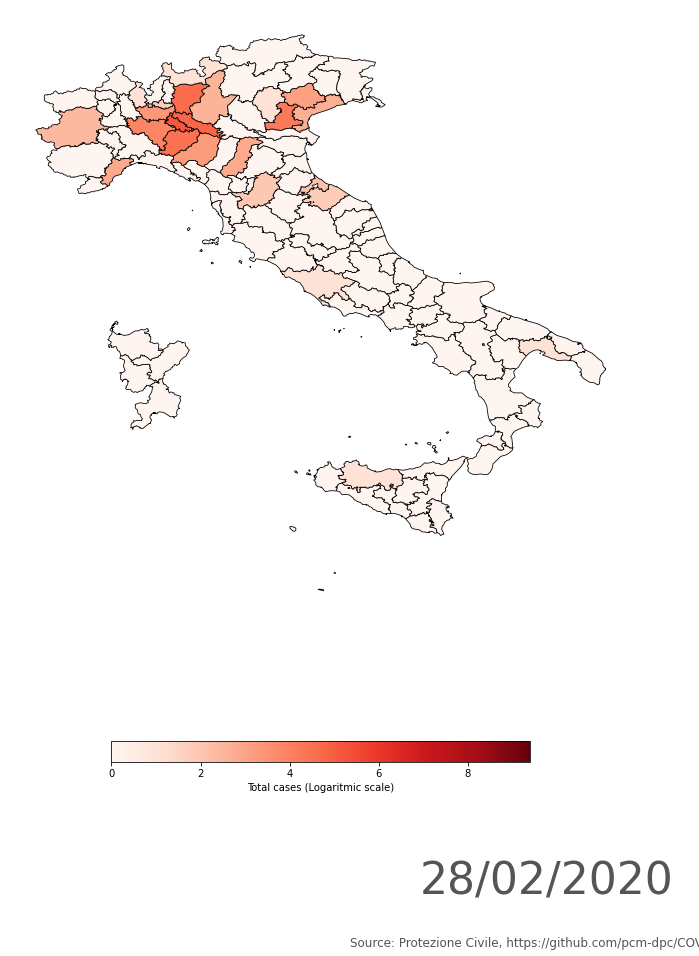

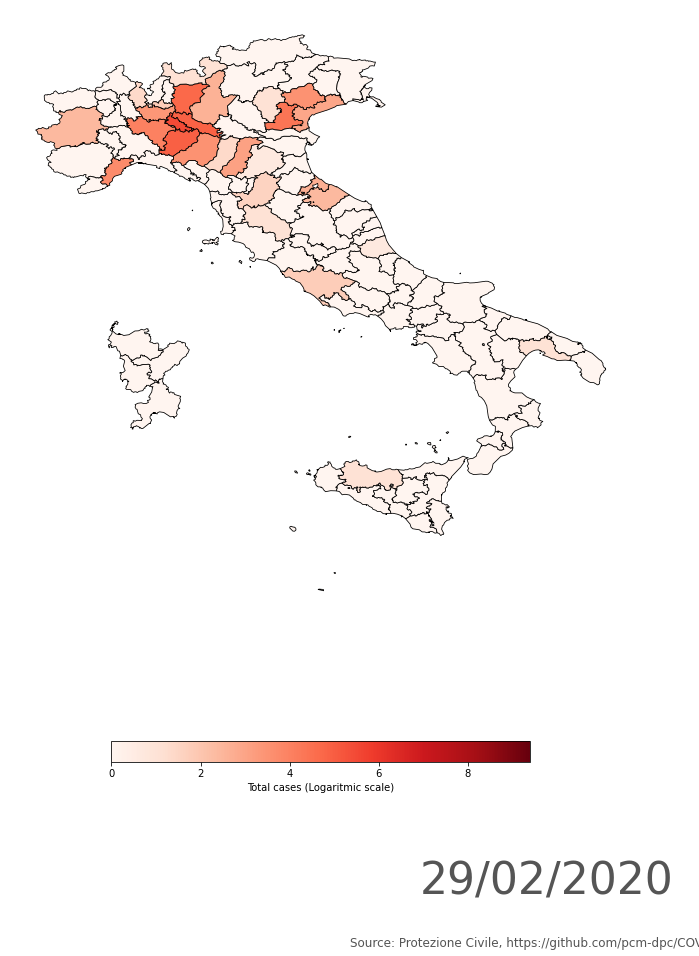

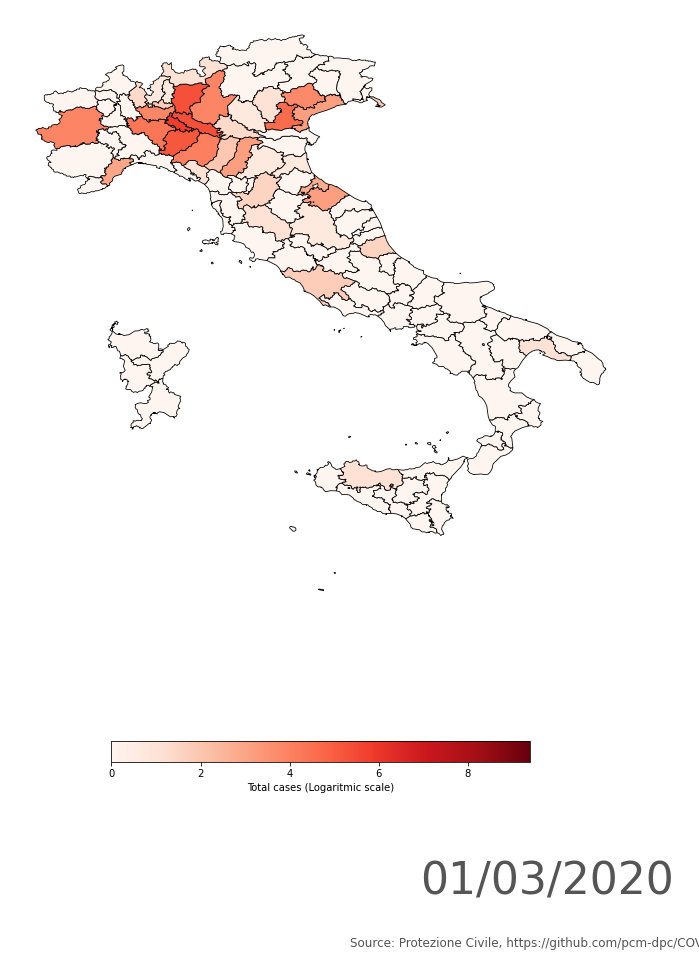

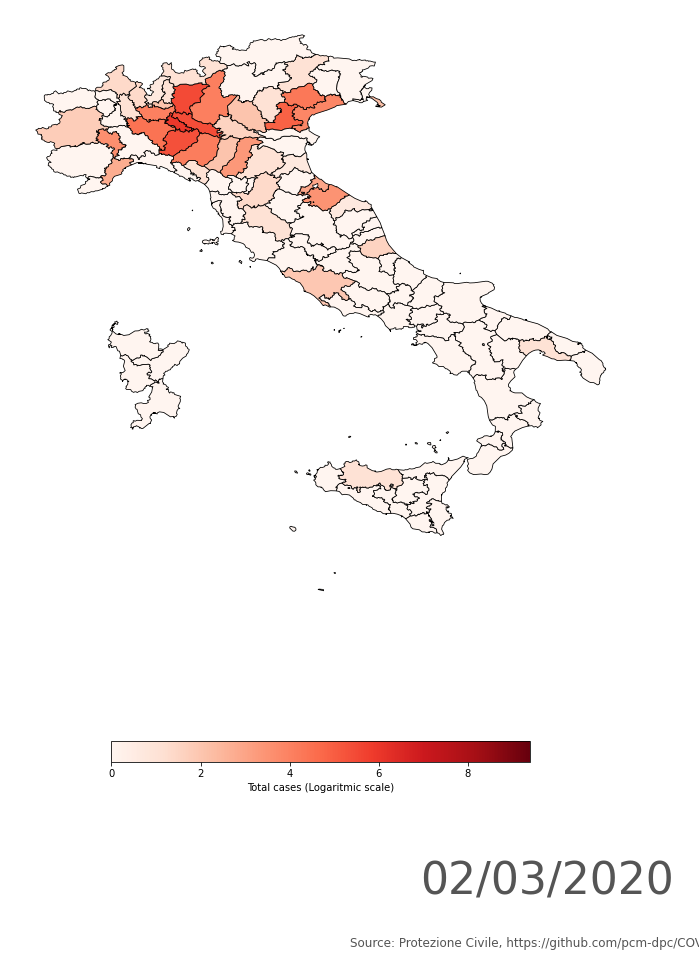

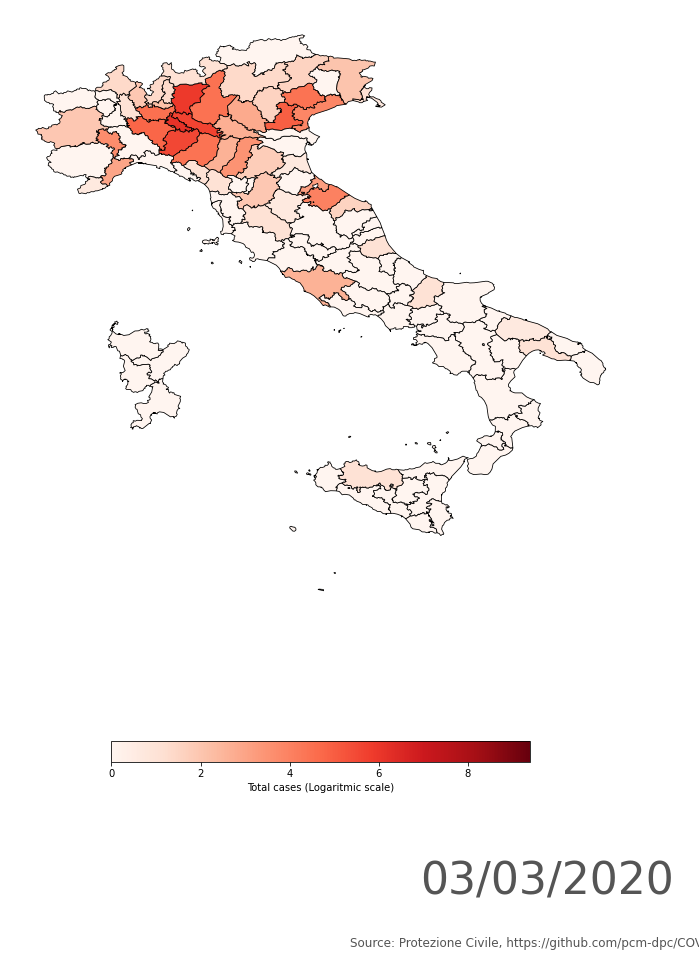

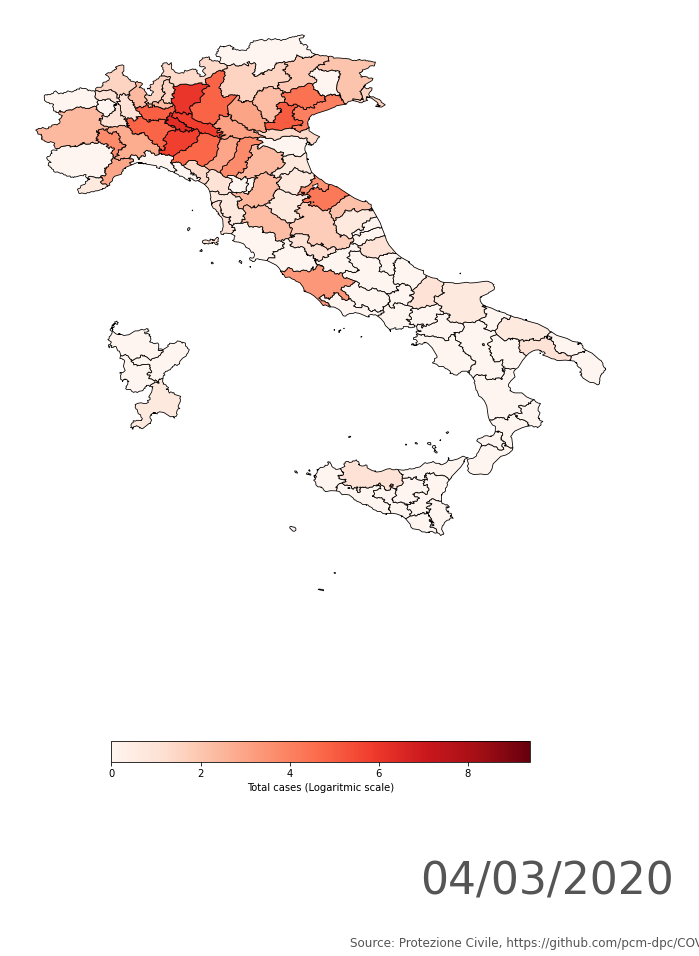

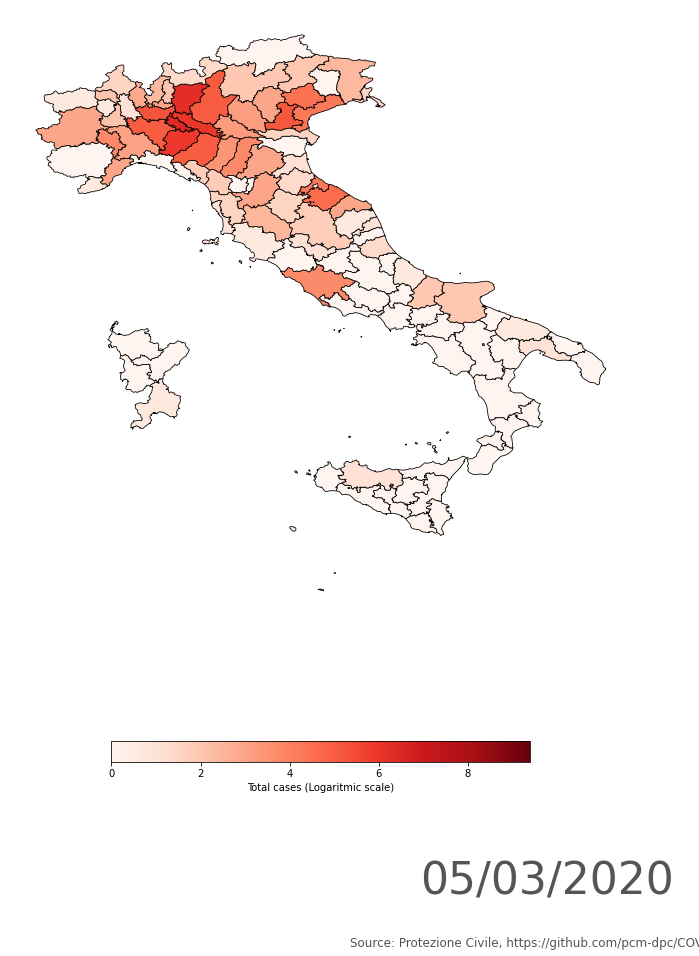

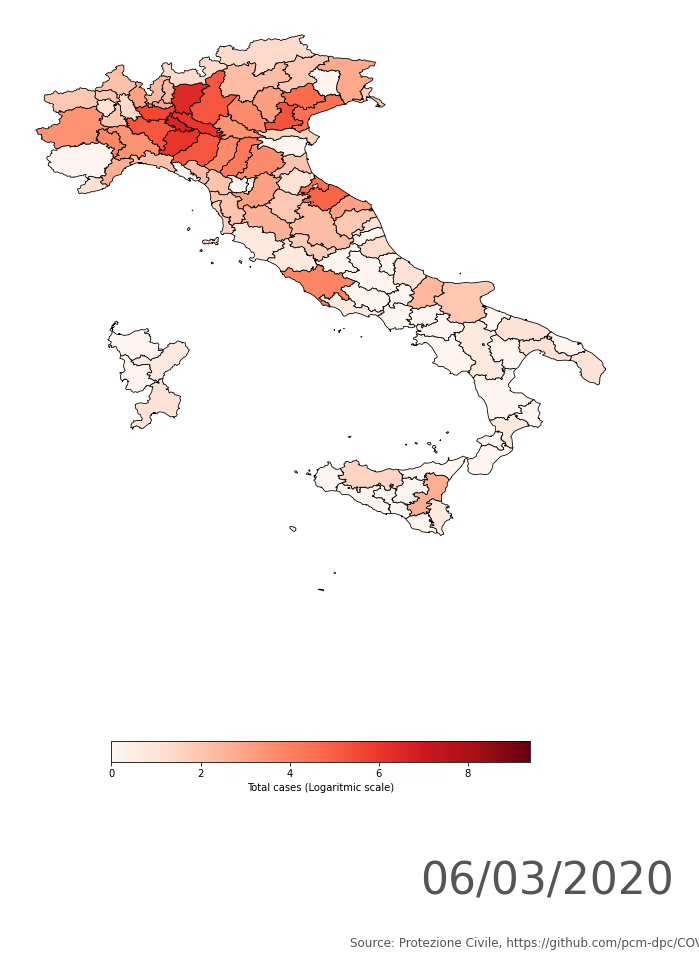

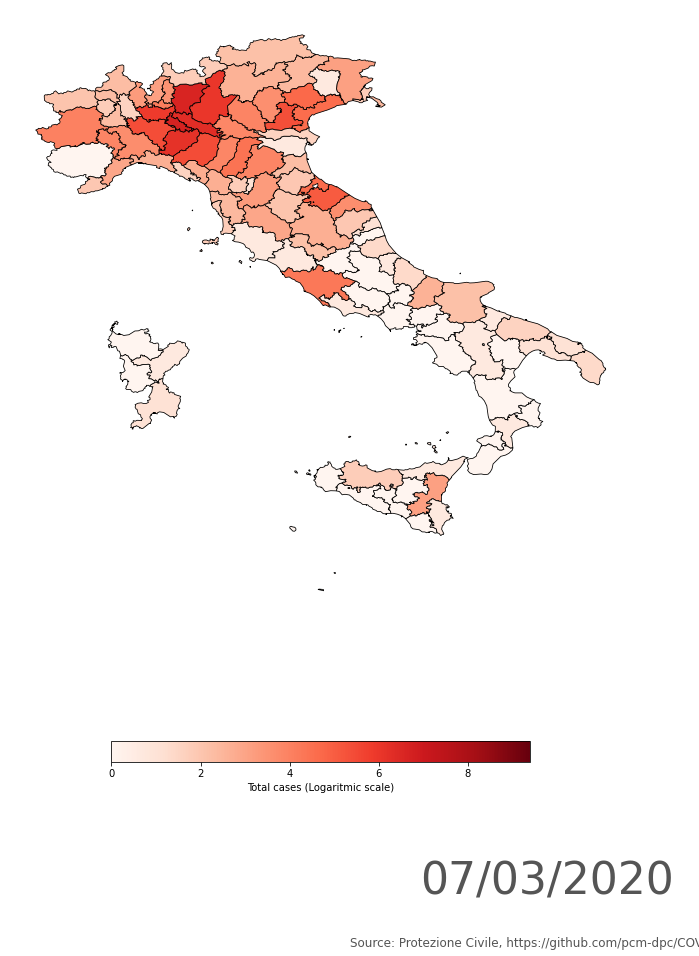

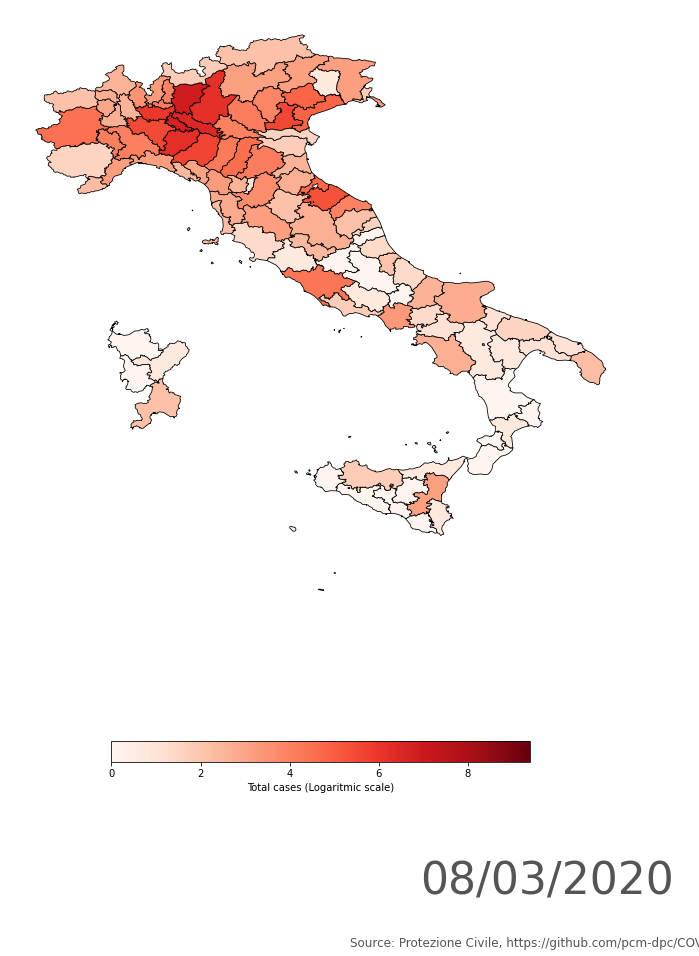

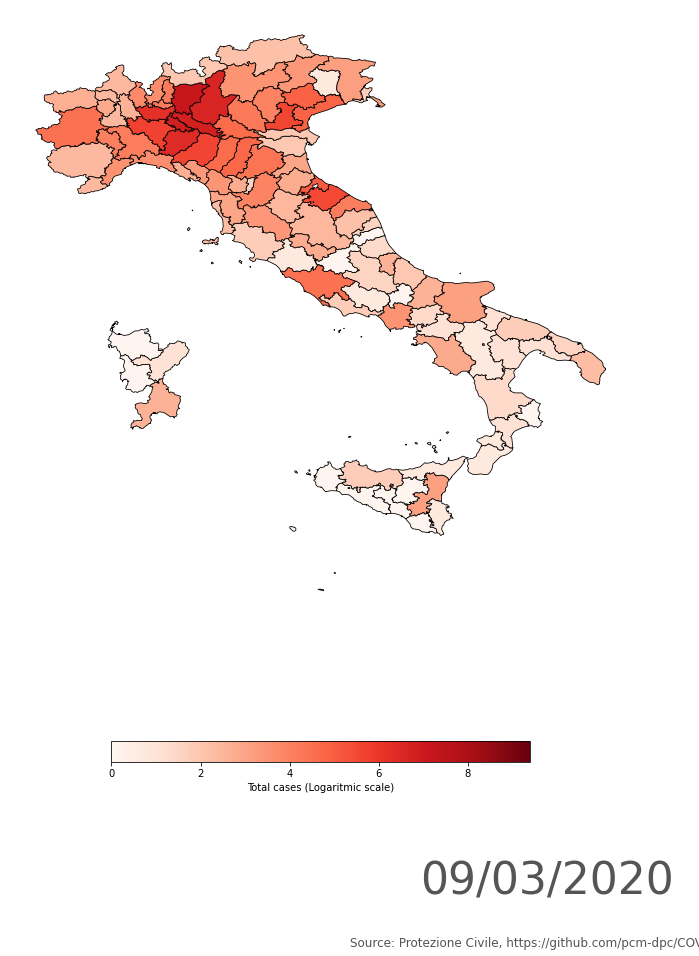

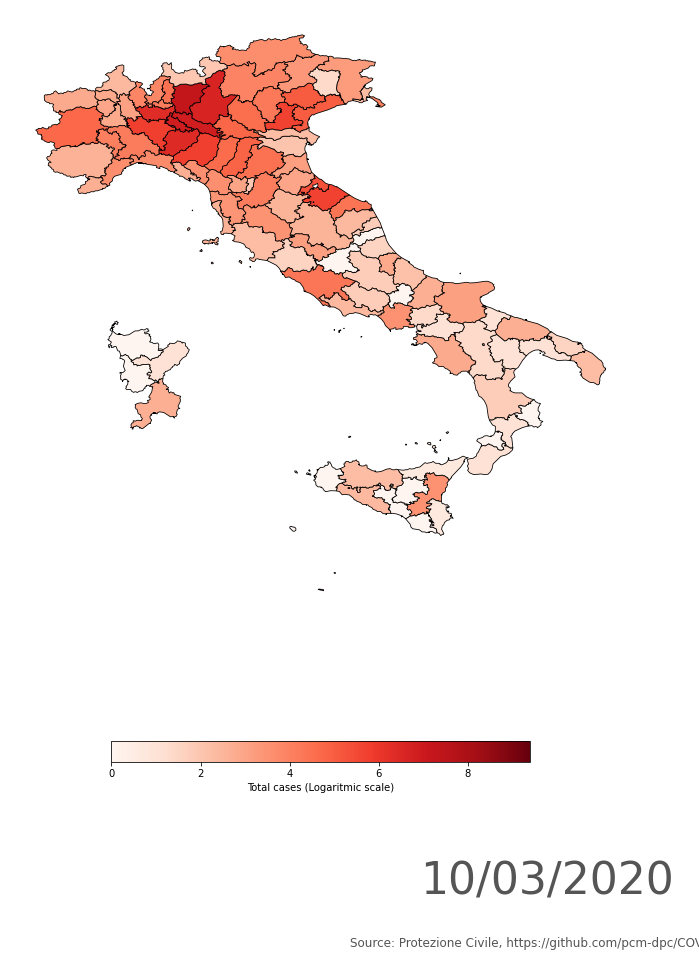

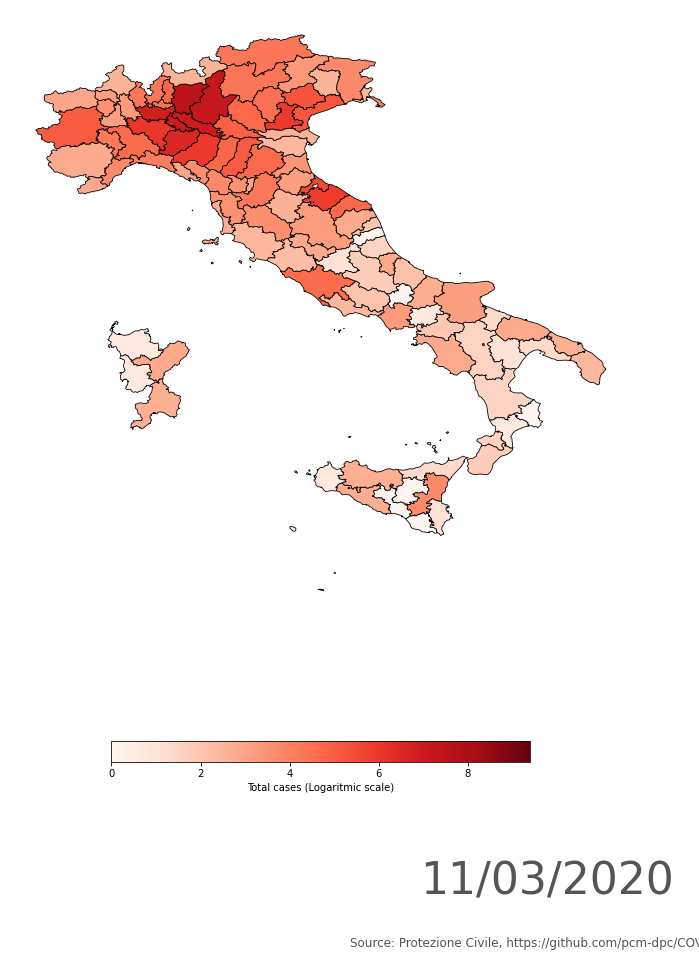

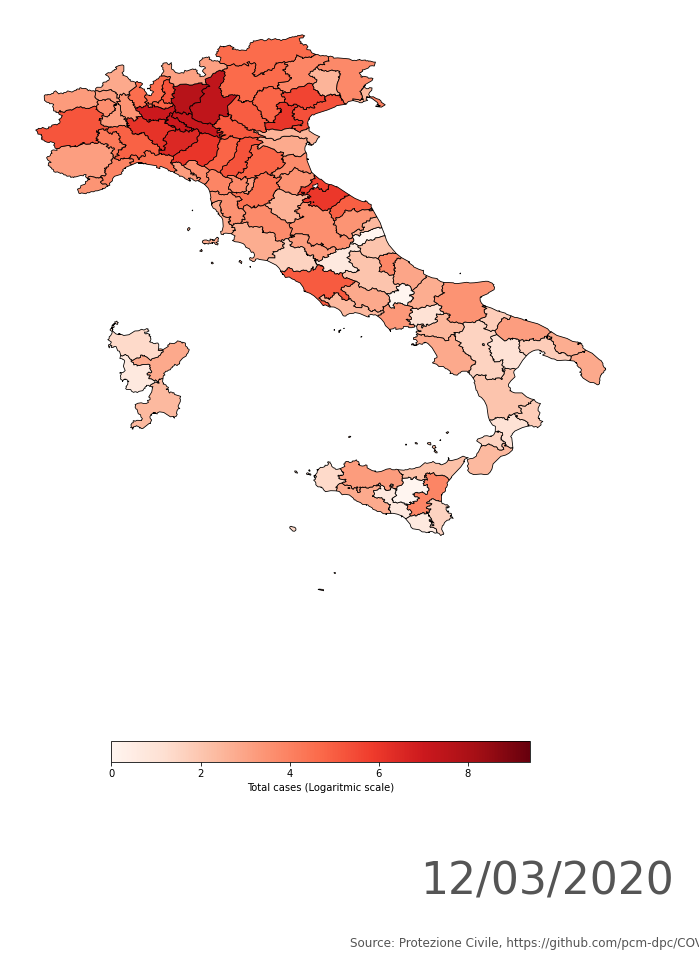

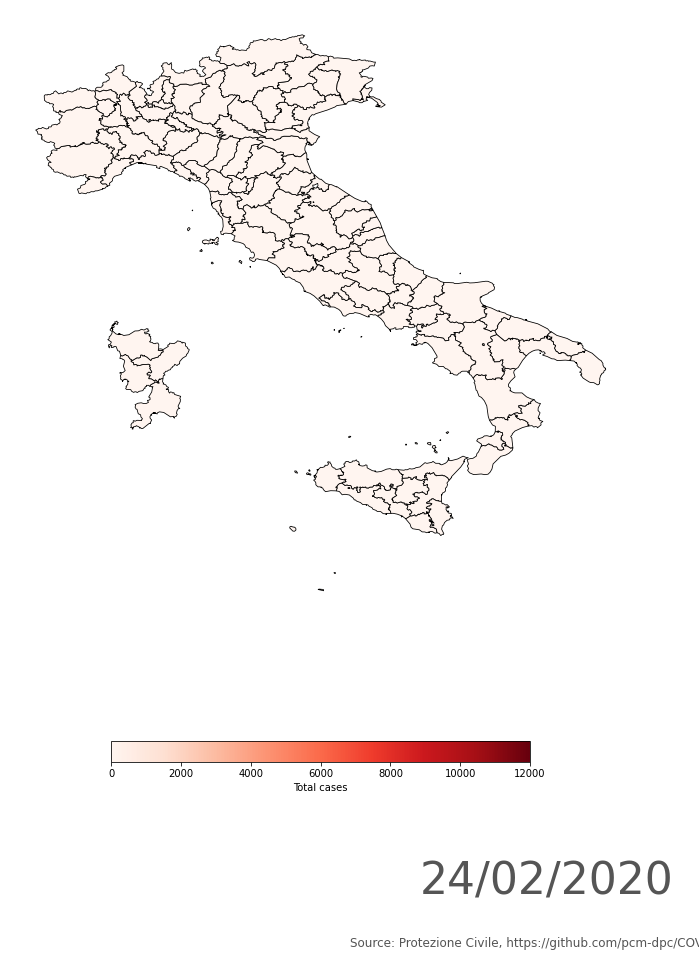

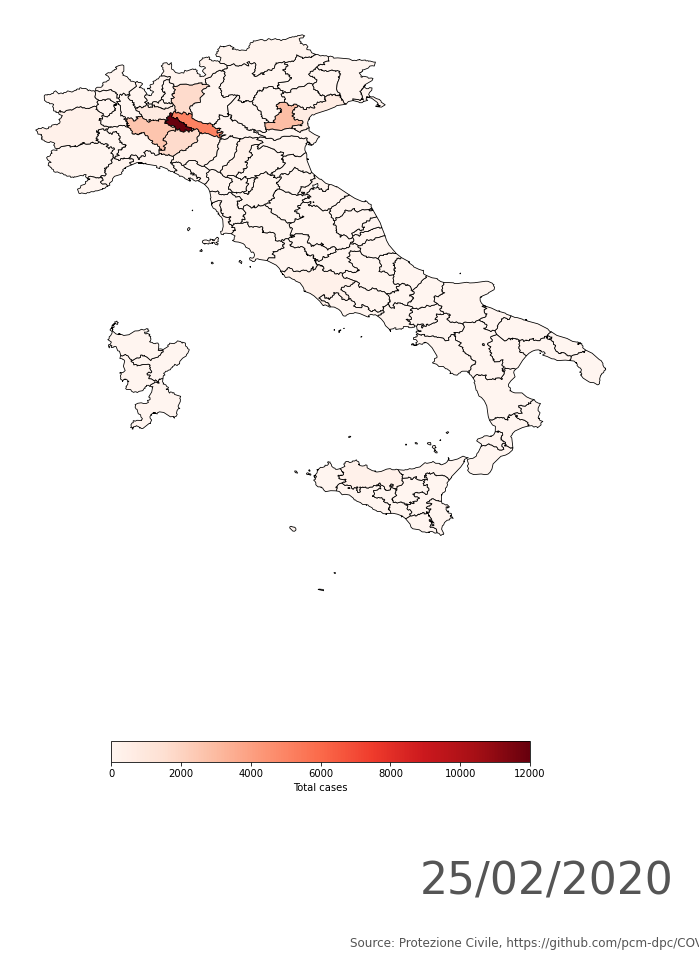

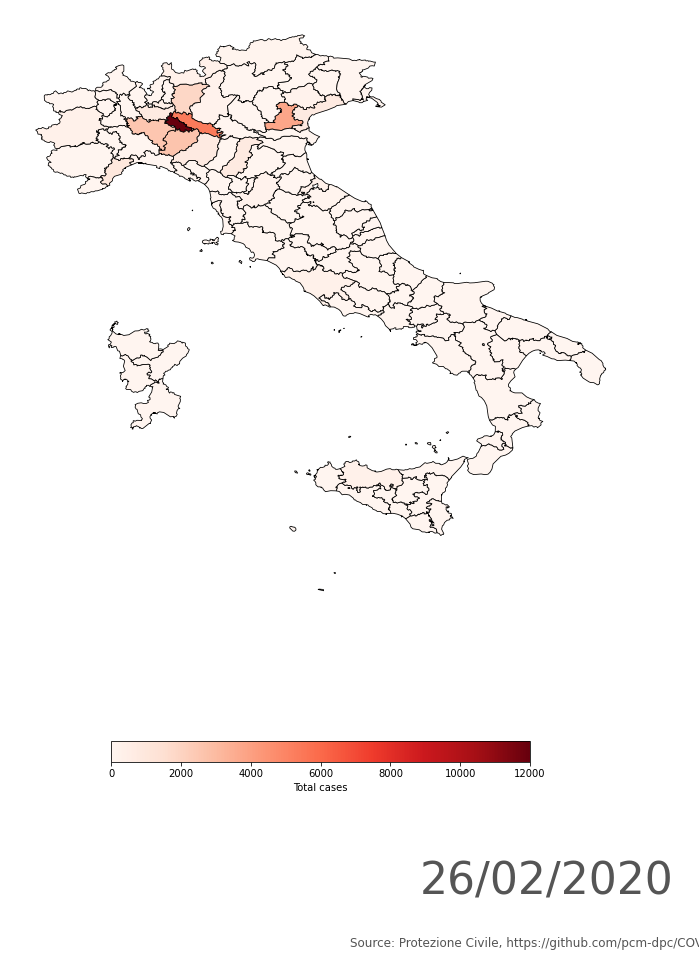

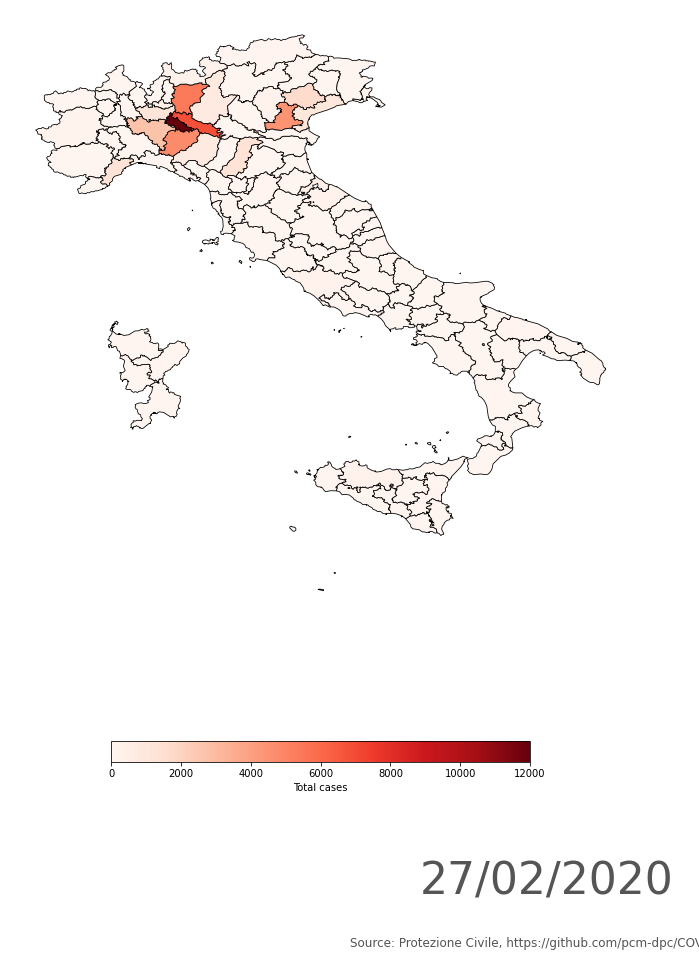

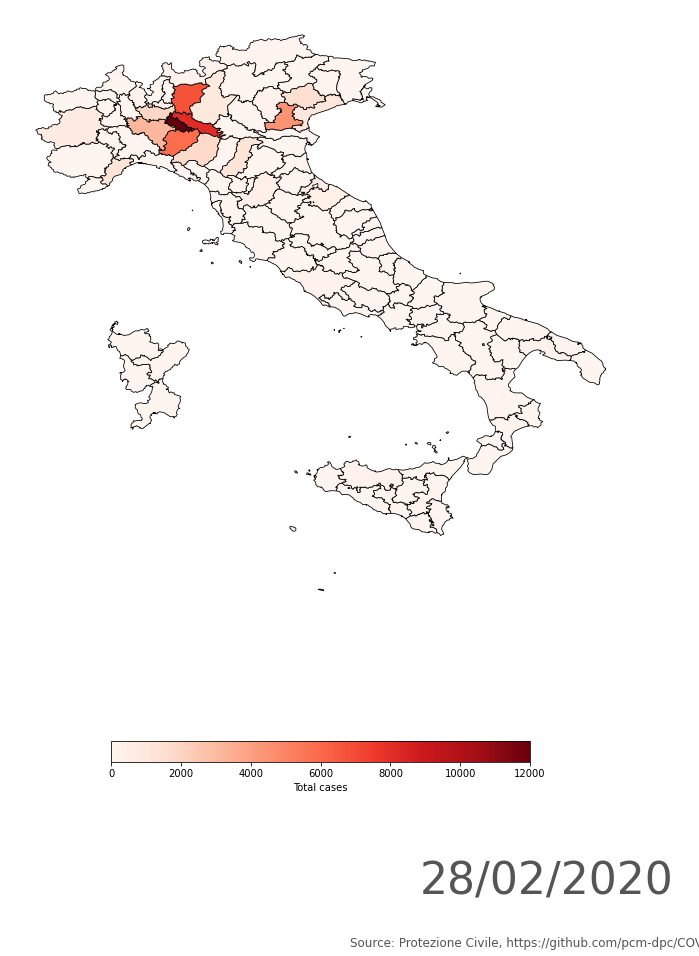

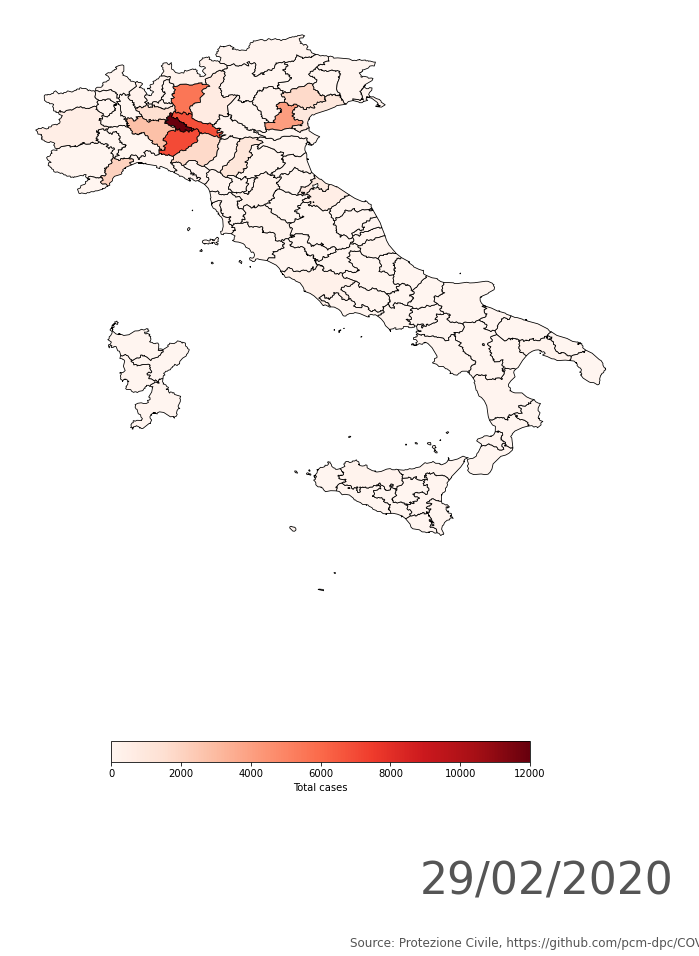

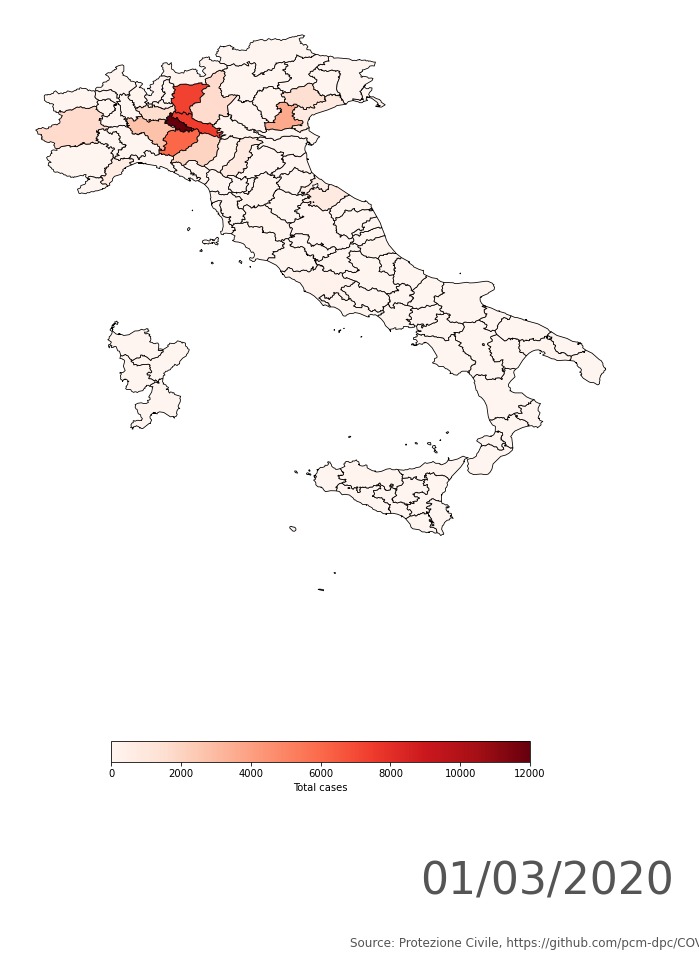

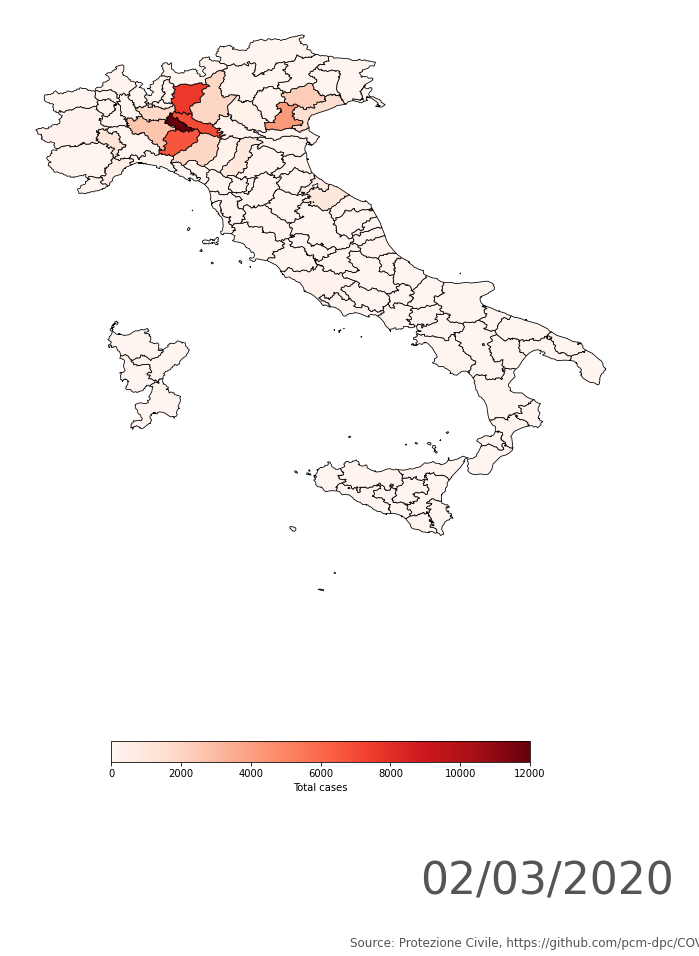

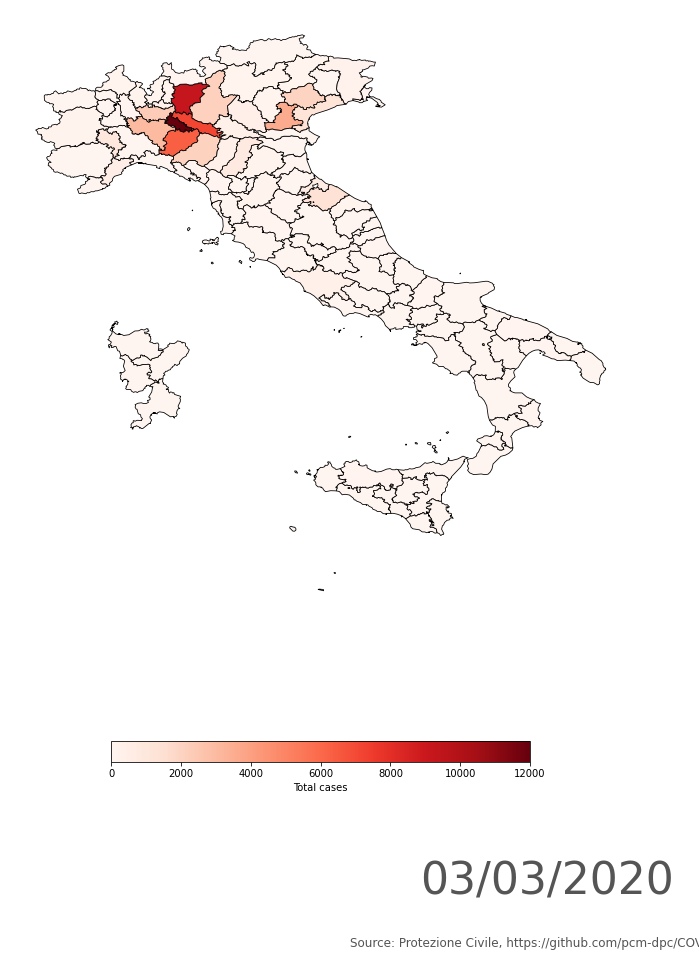

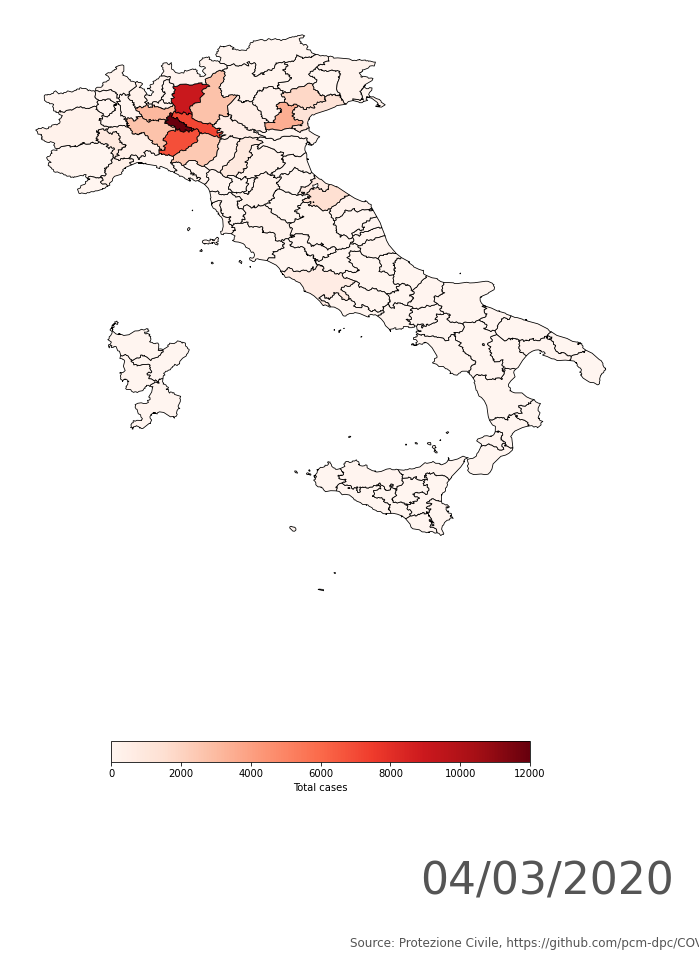

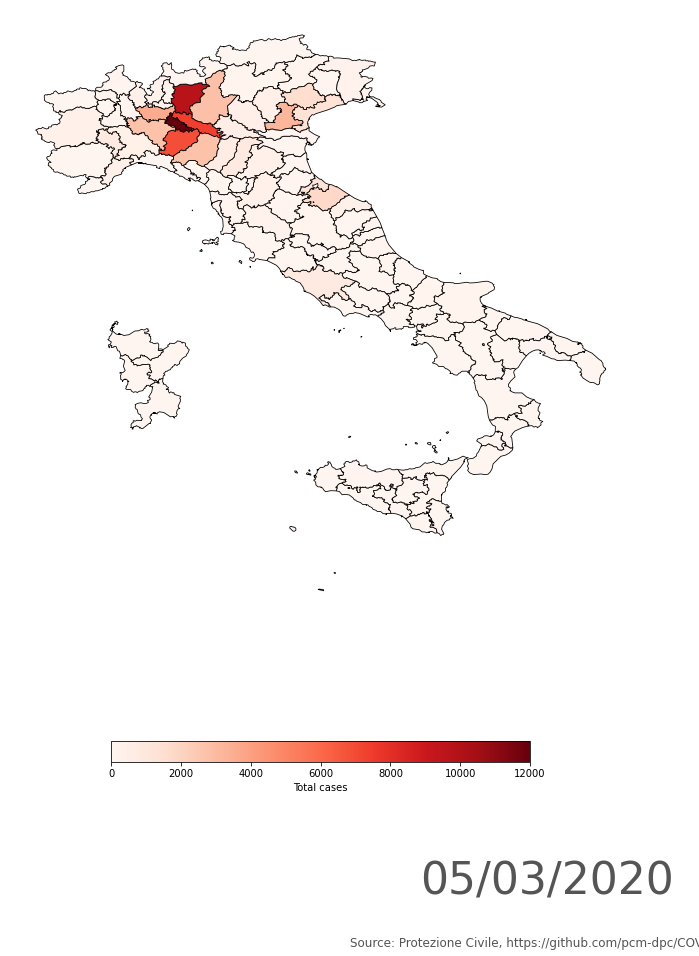

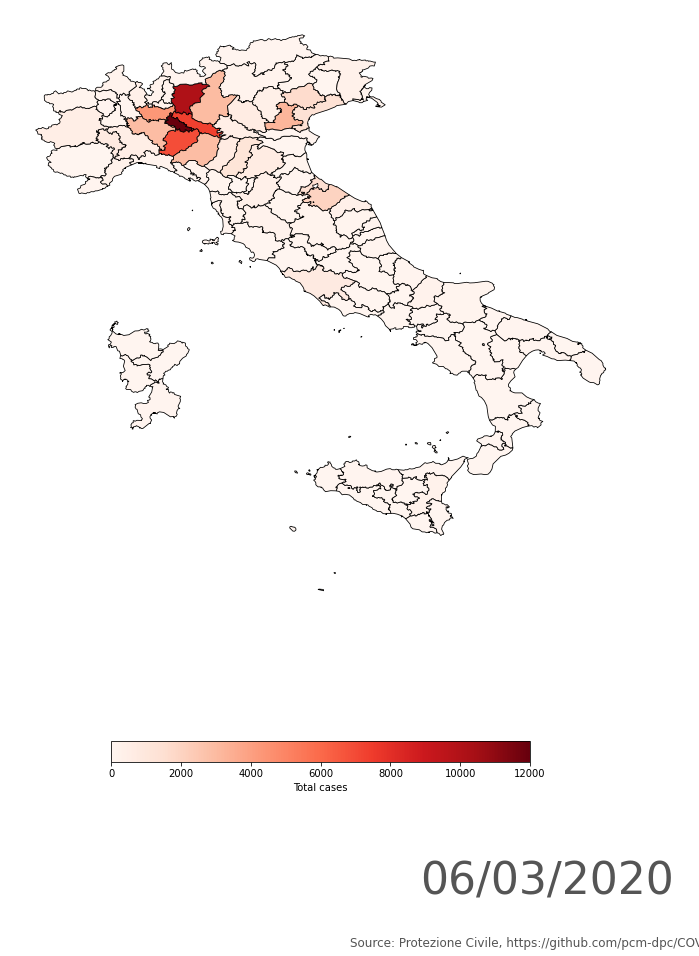

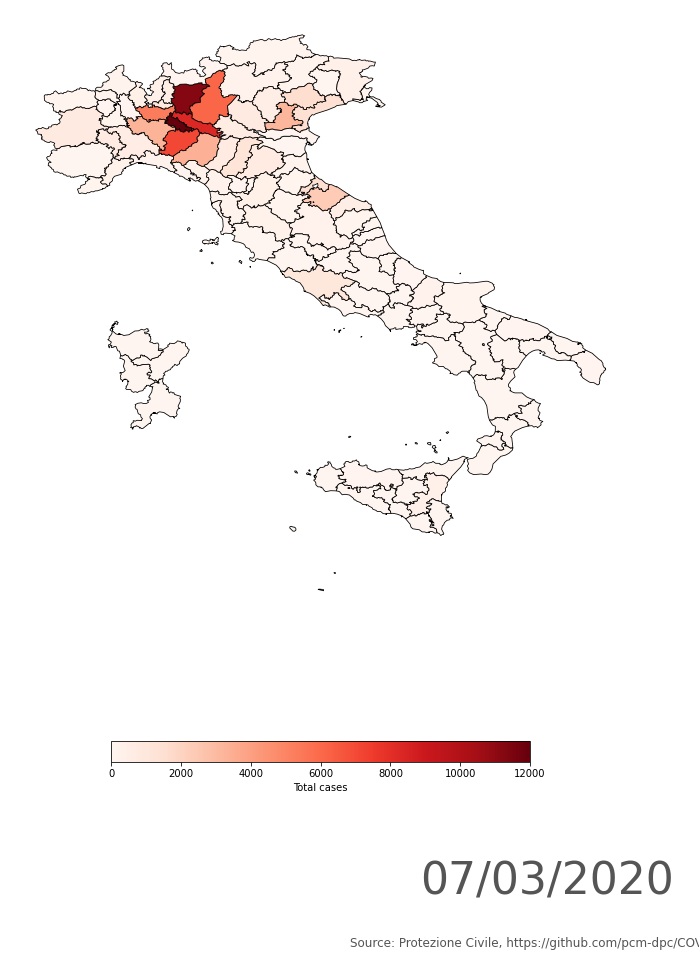

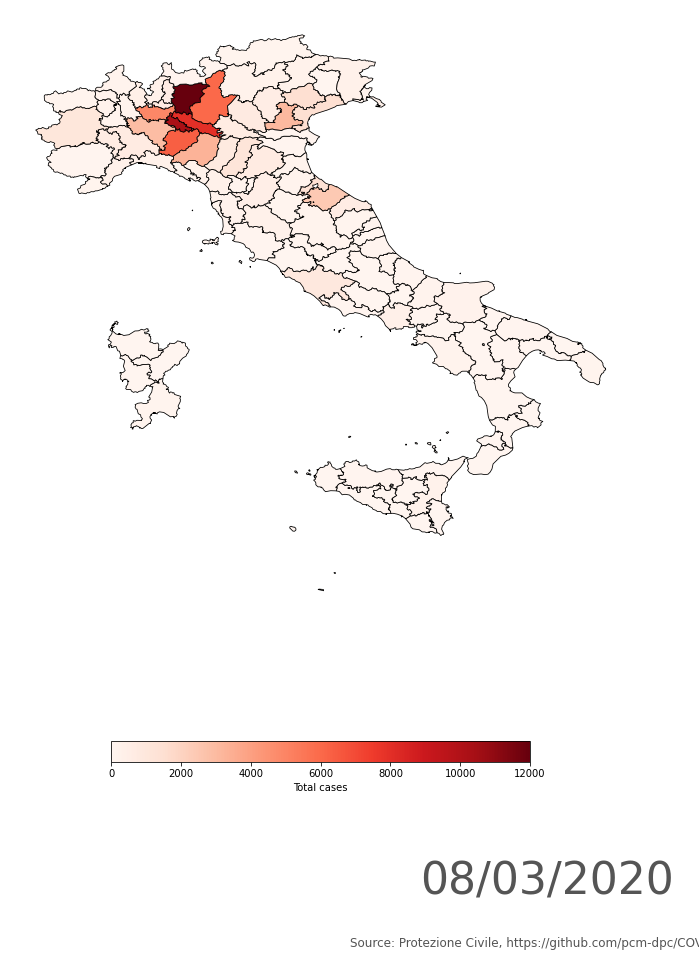

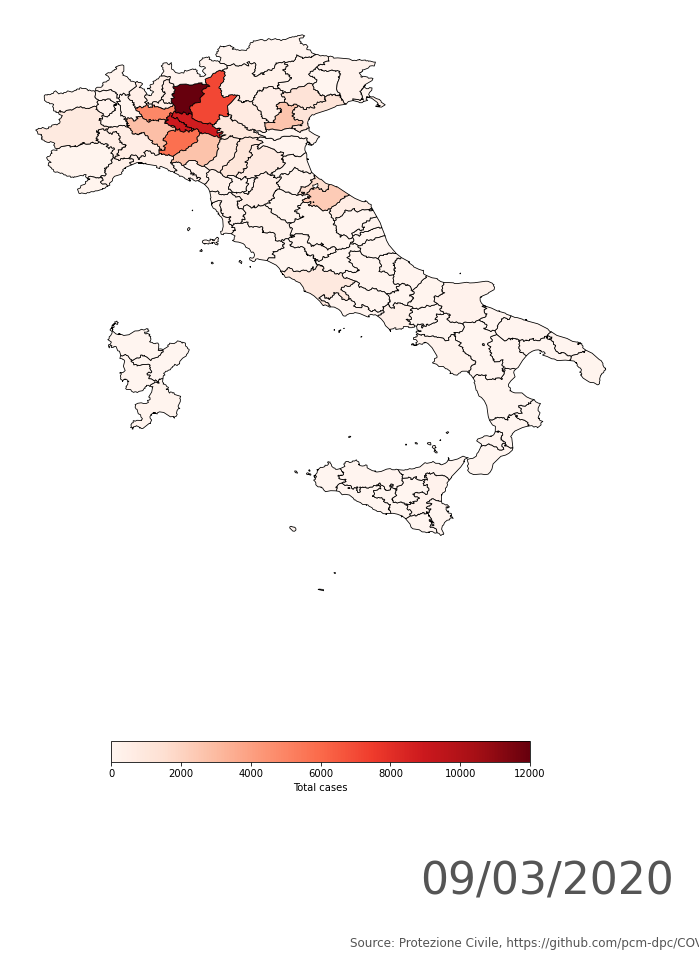

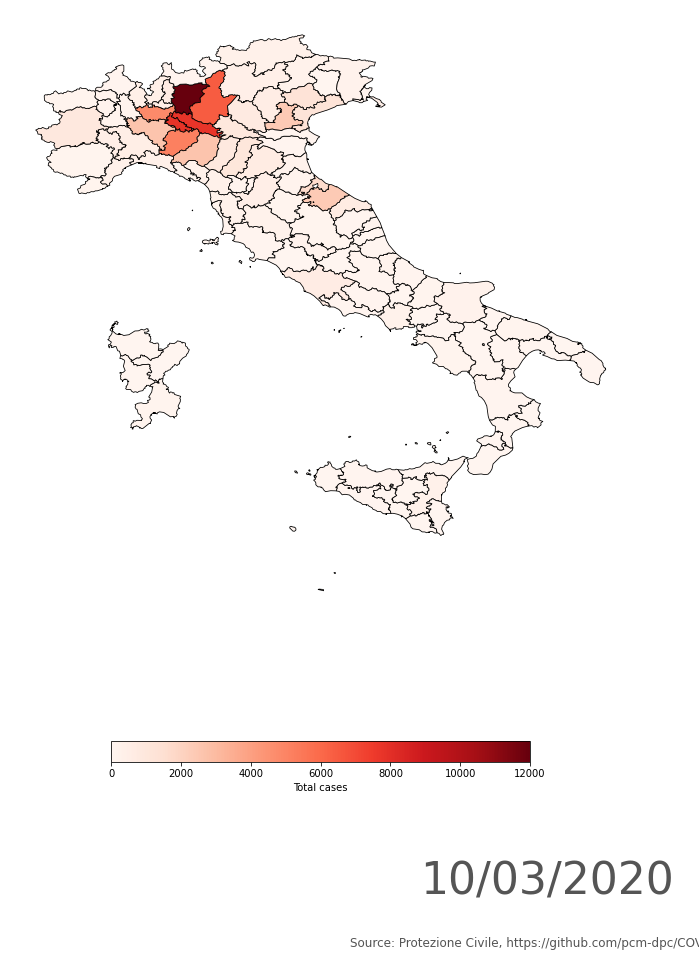

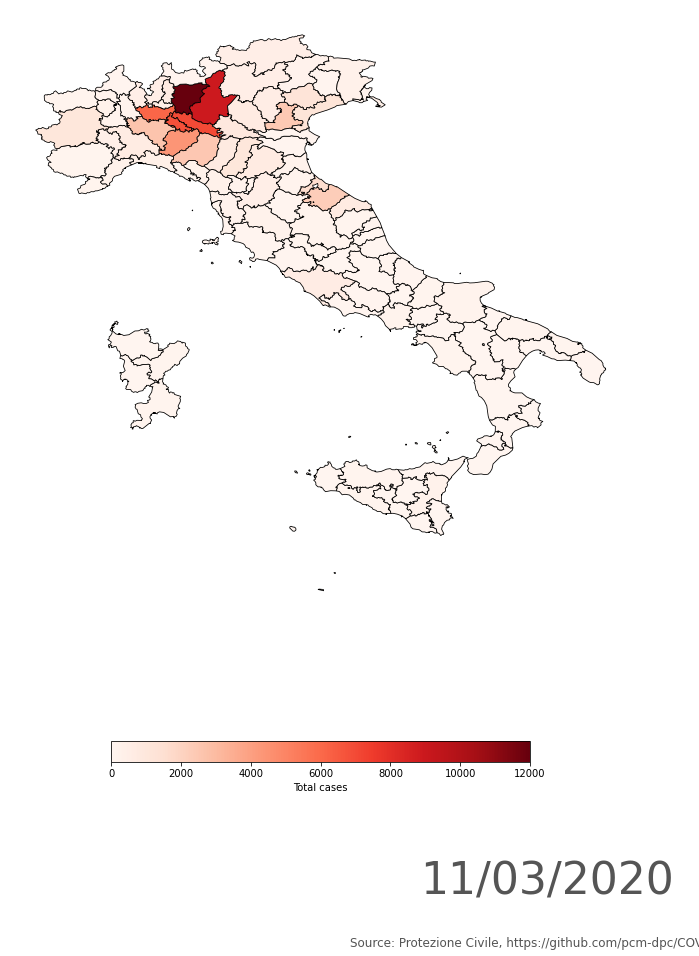

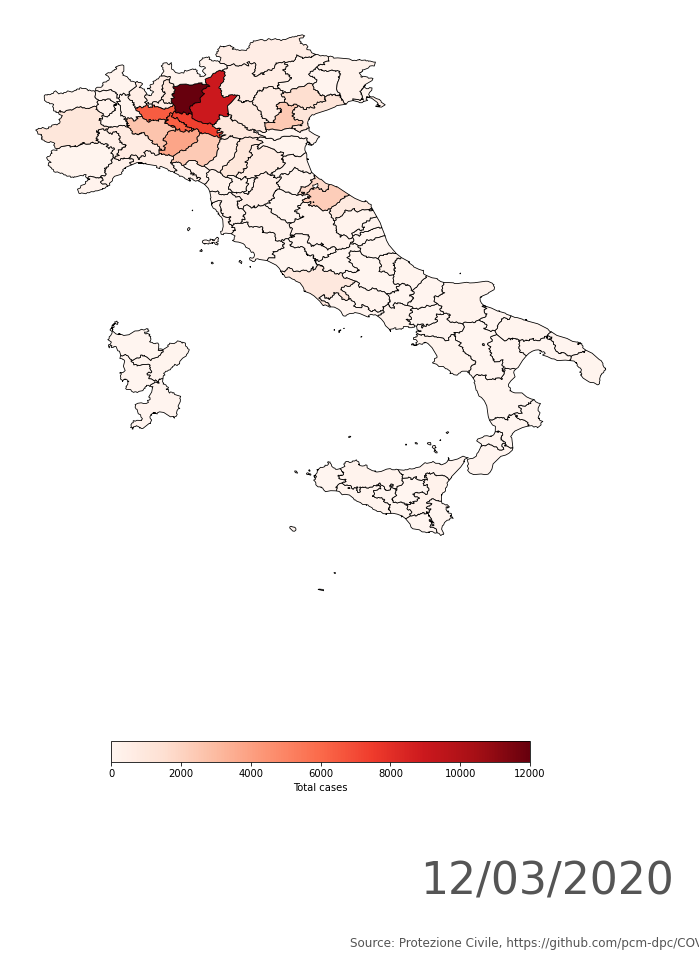

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imageio

def plot_gif( name,title = False, save = False, log = False, legend = True):
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 40,
        }
    # decide wether we normilize or not
    folder = 'dati-province/'
    column = 'totale_casi'
    cmap = 'Reds' #mpl.cm.cool
    df = pd.read_csv(folder+name, header=0,  encoding = "ISO-8859-1")
    df = df.rename(columns={'sigla_provincia': 'sigla'})
    
    if log:
        df['totale_casi'].where(df['totale_casi'] <= 1, 1)
        df['totale_casi'] = df['totale_casi'].apply(lambda x: np.log(float(x)))
        vmin, vmax = 0, np.log(12000)
    else:
        vmin, vmax = 0, 12000
        
    merged = map_df.set_index('sigla').join(df.set_index('sigla'))
    
      
    fig, ax = plt.subplots(1, figsize=(15, 15))
    if title:
        # find title from the name 
        start = int(re.findall(r'(\d{8})', name)[0])
        year = start //10000
        day = start%100
        month = (start%10000)//100
        title = '{0:02}/{1:02}/{2:04}'.format(day, month, year)
        #plt.title(title, fontdict=font)  
        ax.annotate(title, xy=(0.6, 0.1),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=44, color='#555555')
        ax.annotate('Source: Protezione Civile, https://github.com/pcm-dpc/COVID-19',xy=(0.5, 0.02),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
    ax.axis('off')
    if log:
        P = merged.plot(column=column, cmap=cmap,   linewidth=0.8, ax=ax, edgecolor='0',  norm=plt.Normalize(vmin=vmin, vmax=vmax))
    else:
        P = merged.plot(column=column, cmap=cmap,  linewidth=0.8, ax=ax, edgecolor='0')
    
    if legend:
        # Create colorbar as a legend
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
        # empty array for the data range
        sm._A = []
        # add the colorbar to the figure
        if log:
            cbar = fig.colorbar(sm, orientation = 'horizontal', label='Total cases (Logaritmic scale)', fraction = 0.1, shrink = 0.5)
        else:
            cbar = fig.colorbar(sm, orientation = 'horizontal', label='Total cases', fraction = 0.1, shrink = 0.5)

    if save:
        plt.savefig('plot/' + name[:-4] + '.png')
    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('./log.gif', [plot_gif(day, title = True, save = False, log = True) for day in daily_data], fps=1)
imageio.mimsave('./linear.gif', [plot_gif(day, title = True, save = False, log = False) for day in daily_data], fps=1)